귀무가설 (H0): 두 그룹 간의 평균 점수는 차이가 없다. 즉, μ1 = μ2, 여기서 μ1은 첫 번째 데이터 그룹의 평균, μ2는 두 번째 데이터 그룹의 평균이다.

대립가설 (H1 또는 H_a): 두 그룹 간의 평균 점수는 차이가 있다. 즉, μ1 ≠ μ2.

T-검정 결과에서 p-값이 유의수준(일반적으로 0.05)보다 작아서 귀무가설을 기각한 것은, 

두 그룹 간의 평균 점수에 통계적으로 유의미한 차이가 있다는 것을 나타낸다

## 설문조사 산림엑스포, 일반국민 데이터 전처리

데이터수집 - 전처리 - 분석 - 결과도출 순으로 진행

In [1]:
import math # NaN값 구별때문에 import
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
import numpy as np

# matplotlib 한글 글꼴 설정
plt.rc('font', family='Malgun Gothic')

# 모든 열이 생략되지 않도록 설정
pd.set_option('display.max_columns', None)

# 테마 컬러맵 미리 정의
color_scale = ['rgb(5,31,69)',
               'rgb(8,48,107)',
               'rgb(11,62,138)',
               'rgb(8,81,156)',
               'rgb(7,90,176)',
               'rgb(33,113,181)',
               'rgb(66,146,198)',
               'rgb(81,157,207)',
               'rgb(107,174,214)',
               'rgb(158,202,225)',
               'rgb(198,219,239)',
               'rgb(222,235,247)',
               'rgb(247,251,255)']

### 응답자 특성 설문
| `문항` | `보기` |
|:---------:|:---------:|
| <b>`성별`<b> | ①남성    ②여성 |
| <b>`연령`<b>   | ①10대(15세이상)    ②20대   ③30대   ④40대   ⑤50대   ⑥60대이상, 추가설문 : 출생년도(___)년 |
| <b>`학력`<b>   | ①초등학교 졸업(무학 포함)    ②중학교 재학   ③중학교 졸업   ④고등학교 재학   ⑤고등학교 졸업<br>   ⑥대학교 재학    ⑦대학교 졸업    ⑧대학원 재학(석사 또는 박사) ⑨ 대학원 졸업(석사또는 박사) |
| <b>`거주지역`<b>   | ①서울    ②부산   ③대구   ④인천   ⑤광주   ⑥대전    ⑦울산    ⑧세종   ⑨경기<br>   ⑩강원   ⑪충북   ⑫충남   ⑬전북   ⑭전남   ⑮경북   ⑯경남   ⑰제주 |
| <b>`직업`<b>   | ①산림임업종사자    ②사무종사자   ③서비스종사자   ④판매종사자   ⑤기술기능종사자   ⑥단순노무종사자    ⑦전문가(교수 포함)<br>    ⑧경영직종사자   ⑨자영업자(개인사업자)   ⑩공무원(교사포함)   ⑪학생(대학원생포함)   ⑫전업주부   ⑬기타(___) |

In [2]:
# 응답자 특성 딕셔너리
Resp_Character = {
    '성별': {1: '남성', 2: '여성'},
    '연령': {1: '10대(15세이상)', 2: '20대', 3: '30대', 4: '40대', 5: '50대', 6: '60대이상'},
    '학력': {1: '초등학교 졸업(무학 포함)', 2: '중학교 재학', 3: '중학교 졸업', 4: '고등학교 재학', 5: '고등학교 졸업', 6: '대학교 재학', 7: '대학교 졸업', 8: '대학원 재학(석사 또는 박사)', 9: '대학원 졸업(석사또는 박사)'},
    '거주지역': {1: '서울', 2: '부산', 3: '대구', 4: '인천', 5: '광주', 6: '대전', 7: '울산', 8: '세종', 9: '경기', 10: '강원', 11: '충북', 12: '충남', 13: '전북', 14: '전남', 15: '경북', 16: '경남', 17: '제주'},
    '직업': {1: '산림임업종사자', 2: '사무종사자', 3: '서비스종사자', 4: '판매종사자', 5: '기술기능종사자', 6: '단순노무종사자', 7: '전문가(교수 포함)', 8: '경영직종사자', 9: '자영업자(개인사업자)', 10: '공무원(교사포함)', 11: '학생(대학원생포함)', 12: '전업주부', 13: '기타'}}

In [3]:
# 산림엑스포 설문데이터 로드 및 응답자 특성 매핑
df_expo = pd.read_excel('dataset/전국민 산림문화 인식 및 태도 향유실태 조사_산림엑스포_230922.xlsx', sheet_name="DATA")
df_expo['SQ1'] = df_expo['SQ1'].replace(Resp_Character['성별'])
df_expo['SQ2_1'] = df_expo['SQ2_1'].replace(Resp_Character['연령'])
df_expo['SQ3'] = df_expo['SQ3'].replace(Resp_Character['학력'])
df_expo['SQ4'] = df_expo['SQ4'].replace(Resp_Character['거주지역'])
df_expo['SQ5'] = df_expo['SQ5'].replace(Resp_Character['직업'])
# 응답자 특성 5번항목의 '기타'항목자 처리
df_expo['SQ5_13_ETC'] = df_expo['SQ5_13_ETC'].fillna('')
# 연도 column float to int 변환
df_expo['SQ2_2'] = ['' if np.isnan(i) else int(i) for i in df_expo['SQ2_2']]

# 일반국민 설문데이터 로드 및 응답자 특성 매핑
df_common= pd.read_excel('dataset/전국민 산림문화 인식 태도 향유실태 조사_일반국민_230530.xlsx', sheet_name="DATA")
df_common['SQ1'] = df_common['SQ1'].replace(Resp_Character['성별'])
df_common['SQ2_1'] = df_common['SQ2_1'] - 1
df_common['SQ2_1'] = df_common['SQ2_1'].replace(Resp_Character['연령'])
df_common['SQ3'] = df_common['SQ3'].replace(Resp_Character['학력'])
df_common['SQ4'] = df_common['SQ4'].replace(Resp_Character['거주지역'])
df_common['SQ5'] = df_common['SQ5'].replace(Resp_Character['직업'])
# 응답자 특성 5번항목의 '기타'항목자 처리
df_common['SQ5_13_ETC'] = df_common['SQ5_13_ETC'].fillna('')

## Q4. 산림문화가 추구하는 가치

In [4]:
# 응답자 특성과 4번 설문에 대한 항목만 필터링
df_expo_4 = df_expo[list(df_expo.columns[:7]) + list(df_expo.columns[12:23])]
df_common_4 = df_common[list(df_common.columns[:7]) + list(df_common.columns[11:22])]

expo_4_map_dic = { 'Q4_1': '공익적 가치',
        'Q4_2': '경제적 가치',
        'Q4_3': '환경적 가치',
        'Q4_4': '도덕적 가치',
        'Q4_5': '역사적 가치',
        'Q4_6': '예술적 가치',
        'Q4_7': '학술적 가치',
        'Q4_8': '생활적 가치',
        'Q4_9': '공존적 가치',
        'Q4_10': '공동체적 가치',
        'Q4_11': '정서적 가치' }

### 탐색적 요인 분석(Factor Analysis)

In [5]:
df_expo_4_fa = df_expo_4[['Q4_1','Q4_2', 'Q4_3', 'Q4_4', 'Q4_5', 'Q4_6', 'Q4_7', 'Q4_8', 'Q4_9', 'Q4_10','Q4_11']]
df_common_4_fa = df_common_4[['Q4_1','Q4_2', 'Q4_3', 'Q4_4', 'Q4_5', 'Q4_6', 'Q4_7', 'Q4_8', 'Q4_9', 'Q4_10','Q4_11']]

In [6]:
# Bartlett의 테스트
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value = calculate_bartlett_sphericity(df_expo_4_fa)
print(chi_square_value, p_value)
# p-value가 0이므로 탐색적 요인분석에 적합한 데이터라고 할 수 있다

575.2774912235199 9.163345743294843e-88


In [7]:
# Kaiser-Meyer-Olkin (KMO)검정 - 관측된 각 변수와 전체 모델에 대한 적절성을 결정한다.
# 0.6 미민의 KMO값은 부적절한 것으로 간주되며 0.8이상이면 우수하다고 할 수 있다.
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df_expo_4_fa)
print(kmo_model)

0.8757477450270413


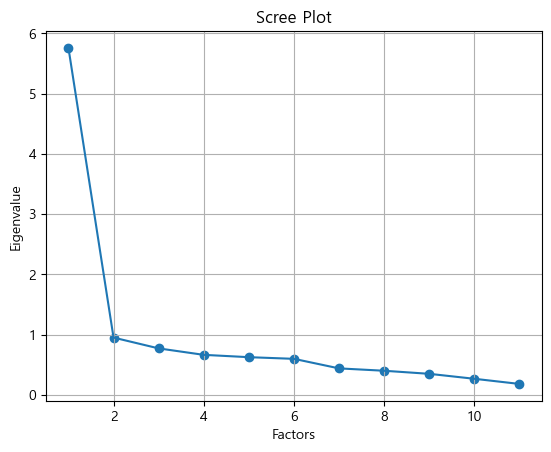

In [8]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# 요인 분석 객체 생성
fa = FactorAnalyzer(n_factors=11, rotation=None)

# 요인 분석 수행
fa.fit(df_expo_4_fa)

# 요인 구조 확인
eigenvalues, vectors = fa.get_eigenvalues()

# 스크리 도표(Scree Plot) 생성
plt.scatter(range(1,df_expo_4_fa.shape[1]+1),eigenvalues)
plt.plot(range(1,df_expo_4_fa.shape[1]+1),eigenvalues)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show() # Eigen값이 1 이상일 때까지 or 그래프 기울기가 완만해지기 전까지 나누어야 데이터결함 최소화 가능 = 2개로 나누어주는 것이 최선

In [9]:
# 탐색적 요인분석 실시
fa = FactorAnalyzer(n_factors=2, rotation="varimax") # ml: 최대우도 방법
fa.fit(df_expo_4_fa)
efa_result = pd.DataFrame(fa.loadings_, index=df_expo_4_fa.columns)
efa_result

,0,1
Q4_1,0.539547,0.324085
Q4_2,0.599158,0.182368
Q4_3,0.560031,0.252959
Q4_4,0.407836,0.520967
Q4_5,0.208007,0.979750
Q4_6,0.587381,0.415723
Q4_7,0.705656,0.199563
Q4_8,0.718078,0.232437
Q4_9,0.737992,0.276168
Q4_10,0.692209,0.287007


<AxesSubplot:>

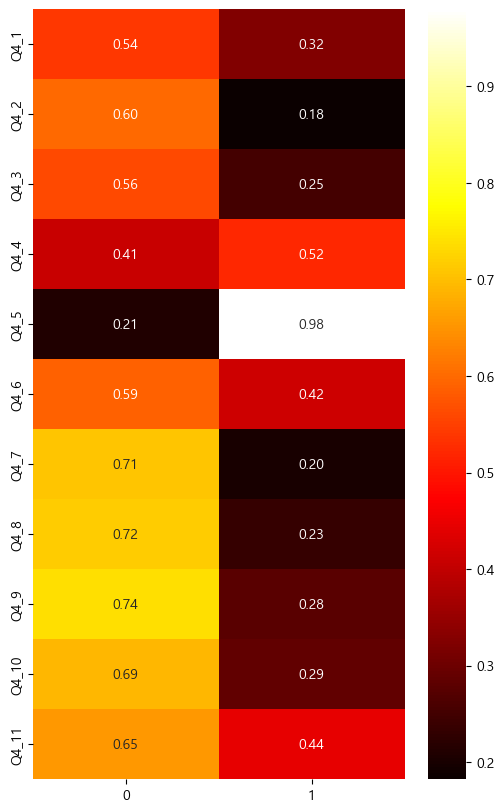

In [10]:
import seaborn as sns
plt.figure(figsize=(6,10))
sns.heatmap(efa_result, cmap='hot', annot=True, fmt='.2f')

In [8]:
# 가중평균 계산 및 리스트 형태로 저장
expo_4_dic = {'설문':list(df_expo_4.columns[7:]),
              '평균':[],
              '5_빈도':[],
              '4_빈도':[],
              '3_빈도':[],
              '2_빈도':[],
              '1_빈도':[],
              '5_비율':[],
              '4_비율':[],
              '3_비율':[],
              '2_비율':[],
              '1_비율':[],
            }

for question in df_expo_4.columns[7:]:
    score_counts = df_expo_4[question].value_counts()#.reset_index()
    weighted_sum = (score_counts.index * score_counts).sum()
    total_count = score_counts.sum()
    weighted_mean = round(weighted_sum / total_count, 2)
    expo_4_dic['평균'].append(weighted_mean)

    score_counts = score_counts.reset_index()
    score_counts.columns = ['점수', '빈도']
    score_counts['비율'] = round((score_counts['빈도'] / score_counts['빈도'].sum()) * 100, 1)
    for num, freq, rate in zip(range(5,0,-1),score_counts['빈도'].tolist(),score_counts['비율'].tolist()):
        expo_4_dic[str(num) + '_빈도'].append(freq)
        expo_4_dic[str(num) + '_비율'].append(rate)
expo_4_df = pd.DataFrame(expo_4_dic)
expo_4_df['설문'] = expo_4_df['설문'].replace(expo_4_map_dic)

In [9]:
# 가중평균 계산 및 리스트 형태로 저장
common_4_dic = {'설문':list(df_common_4.columns[7:]),
              '평균':[],
              '5_빈도':[],
              '4_빈도':[],
              '3_빈도':[],
              '2_빈도':[],
              '1_빈도':[],
              '5_비율':[],
              '4_비율':[],
              '3_비율':[],
              '2_비율':[],
              '1_비율':[],
            }

for question in df_common_4.columns[7:]:
    score_counts = df_common_4[question].value_counts()#.reset_index()
    weighted_sum = (score_counts.index * score_counts).sum()
    total_count = score_counts.sum()
    weighted_mean = round(weighted_sum / total_count, 2)
    common_4_dic['평균'].append(weighted_mean)

    score_counts = score_counts.reset_index()
    score_counts.columns = ['점수', '빈도']
    score_counts['비율'] = round((score_counts['빈도'] / score_counts['빈도'].sum()) * 100, 1)
    for num, freq, rate in zip(range(5,0,-1),score_counts['빈도'].tolist(),score_counts['비율'].tolist()):
        common_4_dic[str(num) + '_빈도'].append(freq)
        common_4_dic[str(num) + '_비율'].append(rate)
common_4_df = pd.DataFrame(common_4_dic)
common_4_df['설문'] = common_4_df['설문'].replace(expo_4_map_dic)

### T - test 

In [26]:
import pandas as pd
import scipy.stats as stats

dic = {
    '가치': [],
    'T_검정통계량': [],
    'p_값': [],
    '귀무가설': [],
}
for i in range(1,12):
    dic['가치'].append(expo_4_map_dic['Q4_%s'%i])
    # T-검정을 수행할 그룹 선택
    group1 = df_expo_4['Q4_%s'%i]
    group2 = df_common_4['Q4_%s'%i].dropna()

    # T-검정 수행
    t_stat, p_value = stats.ttest_ind(group1, group2)

    dic['T_검정통계량'].append(round(t_stat, 6))
    dic['p_값'].append(round(p_value, 6))
    
    # 유의수준 설정
    alpha = 0.05

    # p-값과 유의수준 비교
    if p_value < alpha:
        dic['귀무가설'].append('기각') # 귀무가설 기각: 두 그룹 간에 통계적으로 유의미한 차이가 있음
    else:
        dic['귀무가설'].append('채택') # 귀무가설 채택: 두 그룹 간에 통계적으로 유의미한 차이가 없음

In [27]:
import pandas as pd
import scipy.stats as stats

dic['가치'].append('총평균')
# T-검정을 수행할 그룹 선택
group1 = expo_4_df['평균']
group2 = common_4_df['평균'].dropna()

# T-검정 수행
t_stat, p_value = stats.ttest_ind(group1, group2)

dic['T_검정통계량'].append(round(t_stat, 6))
dic['p_값'].append(round(p_value, 6))

# 유의수준 설정
alpha = 0.05

# p-값과 유의수준 비교
if p_value < alpha:
    dic['귀무가설'].append('기각') # 귀무가설 기각: 두 그룹 간에 통계적으로 유의미한 차이가 있음
else:
    dic['귀무가설'].append('채택') # 귀무가설 채택: 두 그룹 간에 통계적으로 유의미한 차이가 없음
pd.DataFrame(dic)

,가치,T_검정통계량,p_값,귀무가설
0,공익적 가치,5.378268,0.000000,기각
1,경제적 가치,3.151357,0.001652,기각
2,환경적 가치,4.359487,0.000014,기각
3,도덕적 가치,5.328823,0.000000,기각
4,역사적 가치,3.932145,0.000087,기각
5,예술적 가치,4.845289,0.000001,기각
6,학술적 가치,3.690129,0.000231,기각
7,생활적 가치,3.104632,0.001935,기각
8,공존적 가치,6.469806,0.000000,기각
9,공동체적 가치,5.144371,0.000000,기각


In [28]:
pd.DataFrame(dic).to_excel('4_가치별t검정.xlsx')

In [18]:
import plotly.express as px
import plotly.graph_objects as go

# 그래프 생성
fig = go.Figure()

# 엑스포 그래프 추가
fig.add_trace(go.Scatter(x=expo_4_df['설문'], y=expo_4_df['평균'], mode='lines', name='산림엑스포', line=dict(color='blue')))
# 일반국민 그래프 추가
fig.add_trace(go.Scatter(x=common_4_df['설문'], y=common_4_df['평균'], mode='lines', name='일반국민', line=dict(color='red')))

# 각 지점에 숫자 표시하기
for i, row in expo_4_df.iterrows():
    fig.add_annotation(
        text=row['평균'],
        x=row['설문'],
        y=row['평균'],
        showarrow=True,
        arrowhead=7,
        font=dict(size=14)  # annotation 폰트
    )

# 두 번째 꺾은선 그래프의 annotation 추가
for i, row in common_4_df.iterrows():
    fig.add_annotation(
        text=row['평균'],
        x=row['설문'],
        y=row['평균'],
        showarrow=True,
        arrowhead=7,
        font=dict(size=14)  # annotation 폰트
    )

# 그래프 레이아웃 설정
fig.update_layout(
    xaxis_title='문항',
    yaxis_title='평균',
    margin=dict(l=100, r=20, t=50, b=50),  # 그래프 마진 조정
    yaxis_title_font=dict(
        size=15,  # Y 레이블 폰트 크기
    ),
    xaxis_title_font=dict(
        size=15,  # X 레이블 폰트 크기
    )
)
# 평균선 추가
average_line1 = expo_4_df['평균'].mean()  # 평균값 계산
average_line2 = common_4_df['평균'].mean()  # 평균값 계산
fig.add_shape(
    go.layout.Shape(
        type='line',
        x0=expo_4_df['설문'].tolist()[0],
        x1=expo_4_df['설문'].tolist()[-1],
        y0=average_line1,
        y1=average_line1,
        line=dict(color='green', width=2, dash='dash'),
    )
)
fig.add_shape(
    go.layout.Shape(
        type='line',
        x0=common_4_df['설문'].tolist()[0],
        x1=common_4_df['설문'].tolist()[-1],
        y0=average_line2,
        y1=average_line2,
        line=dict(color='green', width=2, dash='dash'),
    )
)

# 평균선에 평균을 나타내는 annotation 추가
fig.add_annotation(
    text=f'평균: {average_line1:.2f}',
    x='예술적 가치',
    y=average_line1,
    showarrow=True,
    arrowhead=7,
    font=dict(size=10)
)
# 평균선에 평균을 나타내는 annotation 추가
fig.add_annotation(
    text=f'평균: {average_line2:.2f}',
    x='예술적 가치',
    y=average_line2,
    showarrow=True,
    arrowhead=7,
    font=dict(size=10)
)
# 범례 추가
fig.update_layout(legend=dict(orientation="h", x=0.02, y=0.98), showlegend=True)

# 여백 (margin) 조정
fig.update_layout(margin=dict(l=100, r=100, b=70, t=70))

# 그래프 그리기
fig.show()

In [16]:
expo_4_rate_df = expo_4_df[['설문','5_비율','4_비율', '3_비율', '2_비율', '1_비율']]
common_4_rate_df = common_4_df[['설문','5_비율','4_비율', '3_비율', '2_비율', '1_비율']]

In [17]:
expo_4_rate_df_t = expo_4_rate_df.T
header = expo_4_rate_df_t.iloc[0]
expo_4_rate_df_t = expo_4_rate_df_t[1:]
expo_4_rate_df_t.rename(columns=header, inplace=True)
expo_4_rate_df_t.index = [i[0]+'점' for i in expo_4_rate_df_t.index]
expo_4_rate_df_t

,공익적 가치,경제적 가치,환경적 가치,도덕적 가치,역사적 가치,예술적 가치,학술적 가치,생활적 가치,공존적 가치,공동체적 가치,정서적 가치
5점,44.8,35.2,62.9,36.2,34.3,36.2,33.3,39.0,67.6,42.9,44.8
4점,29.5,31.4,22.9,31.4,28.6,28.6,31.4,38.1,16.2,28.6,29.5
3점,17.1,21.0,10.5,23.8,25.7,24.8,25.7,18.1,11.4,17.1,14.3
2점,7.6,11.4,1.9,7.6,8.6,6.7,5.7,2.9,3.8,8.6,10.5
1점,1.0,1.0,1.9,1.0,2.9,3.8,3.8,1.9,1.0,2.9,1.0


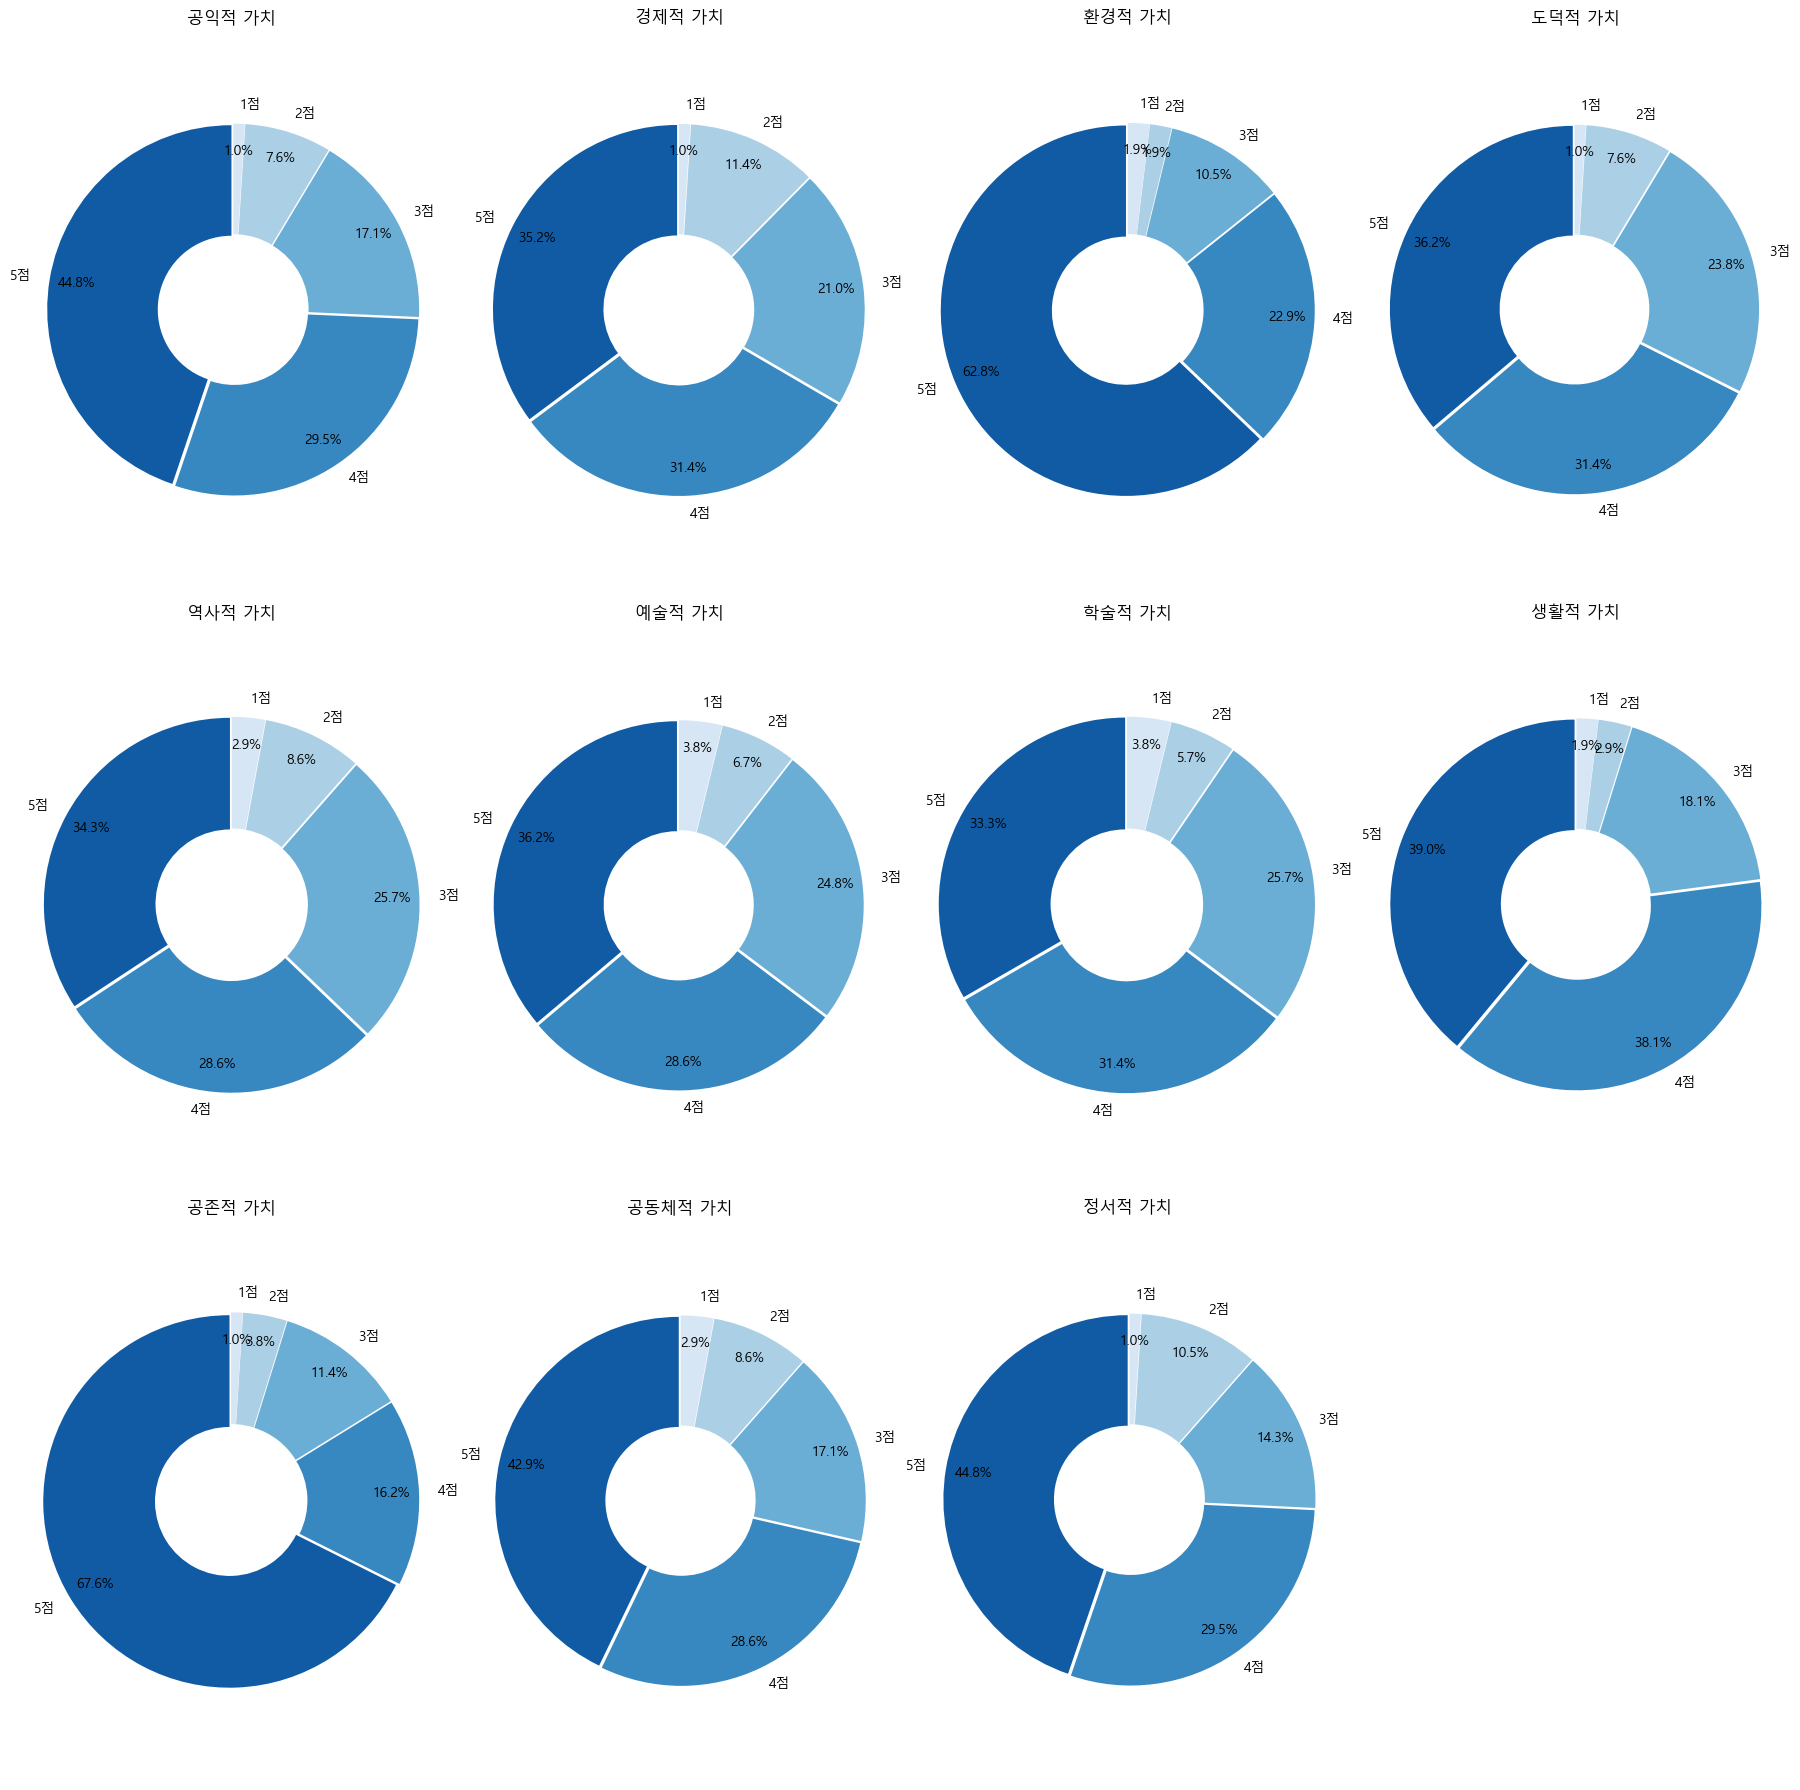

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

categories = list(expo_4_rate_df_t.columns)
ratings = list(expo_4_rate_df_t.index)
# 색상 팔레트 정의
colors = sns.color_palette("Blues", n_colors=len(ratings))[::-1]

fig, axes = plt.subplots(3, 4, figsize=(18, 18))

for i in range(3):
    for j in range(4):
        if i == 2 and j == 3:
            break
        category = categories[i * 4 + j]
        values = [expo_4_rate_df_t[category][rating] for rating in ratings]
        
        ax = axes[i, j]

        # pull을 사용하여 섹션을 약간 벌어지게 하고 hole을 설정
        pull = (0.01, 0.01, 0.01, 0.01, 0.01)
        ax.pie(values, labels=ratings, autopct='%1.1f%%', startangle=90, colors=colors, 
               explode=pull, wedgeprops=dict(width=0.6), pctdistance=0.85)
        ax.set_title(category)
        ax.axis('equal')
plt.axis('off')
plt.tight_layout()
plt.savefig('ex_pic/4/4_multipie.png', dpi=300)
plt.show()

In [19]:
expo_4_rate_df_t = expo_4_rate_df.set_index(keys='설문')
expo_4_array = expo_4_rate_df_t.to_numpy()
common_4_rate_df_t = common_4_rate_df.set_index(keys='설문')
common_4_array = common_4_rate_df_t.to_numpy()

In [20]:
expo_4_rate_df_t

,5_비율,4_비율,3_비율,2_비율,1_비율
설문,,,,,
공익적 가치,44.8,29.5,17.1,7.6,1.0
경제적 가치,35.2,31.4,21.0,11.4,1.0
환경적 가치,62.9,22.9,10.5,1.9,1.9
도덕적 가치,36.2,31.4,23.8,7.6,1.0
역사적 가치,34.3,28.6,25.7,8.6,2.9
예술적 가치,36.2,28.6,24.8,6.7,3.8
학술적 가치,33.3,31.4,25.7,5.7,3.8
생활적 가치,39.0,38.1,18.1,2.9,1.9
공존적 가치,67.6,16.2,11.4,3.8,1.0


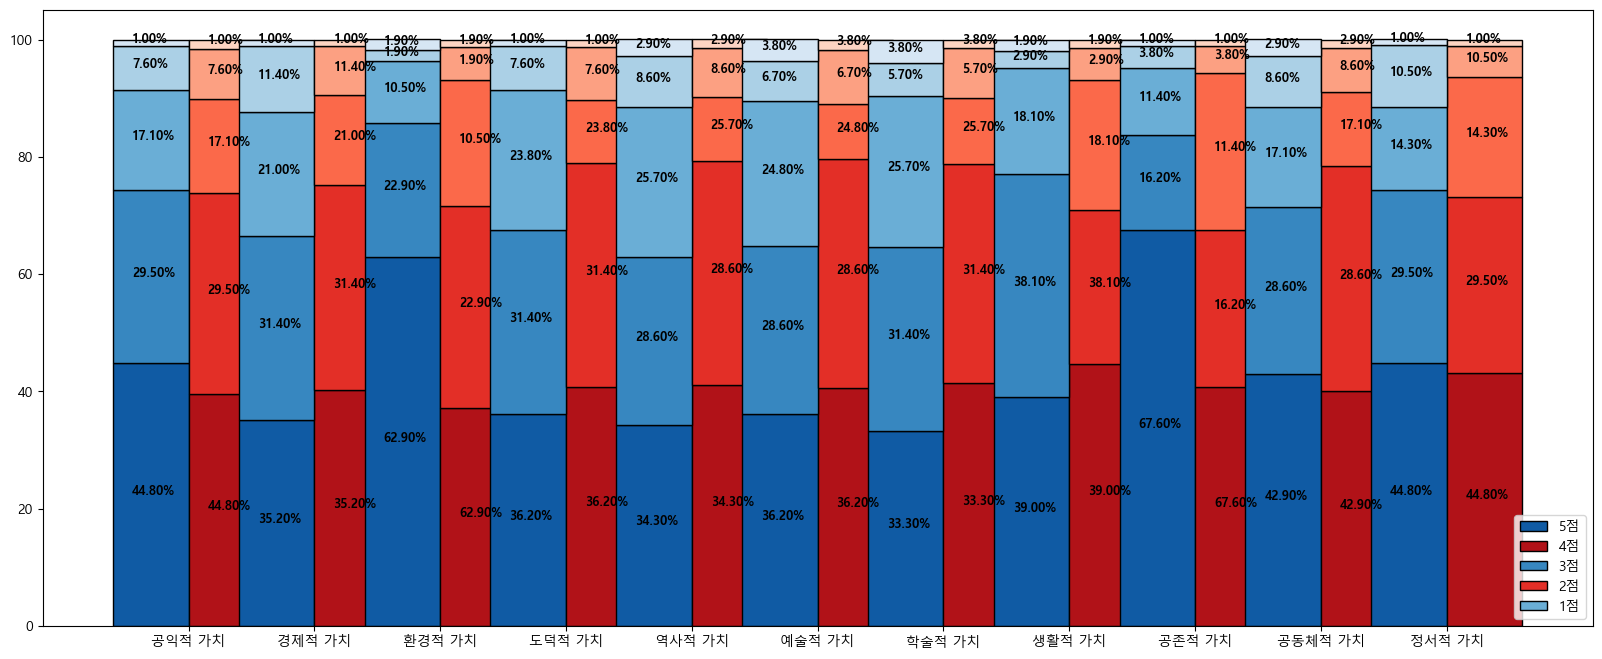

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 8))
ax = plt.subplot()

# Set x-axis ticks and labels based on expo_4_rate_df_t.index
ax.set_xticks(range(len(expo_4_rate_df_t.index)))
ax.set_xticklabels(expo_4_rate_df_t.index)

# 색상 팔레트 정의
colors1 = sns.color_palette("Blues", n_colors=len(ratings))[::-1]
colors2 = sns.color_palette("Reds", n_colors=len(ratings))[::-1]

# 범례 라벨 정의
legend_labels = ['5점', '4점', '3점', '2점', '1점']

for j in range(expo_4_array.shape[0]):
    for i in range(5):
        bottom1 = np.sum(expo_4_array[j, :i])
        ratio1 = expo_4_array[j, i]
        ax_1 = ax.bar(j - 0.6, expo_4_array[j, i], width=0.6, bottom=bottom1, color=colors1[i],
                      edgecolor='black', linewidth=1, align='edge', label=legend_labels[i])
        bottom2 = np.sum(common_4_array[j, :i])
        ratio2 = expo_4_array[j, i]
        ax_2 = ax.bar(j, common_4_array[j, i], width=0.6, bottom=bottom2, color=colors2[i],
                      edgecolor='black', linewidth=1, align='edge', label=legend_labels[i])

        for p in ax_1.patches:
            width, height = p.get_width(), p.get_height()
            # 비율 표시
            ax.annotate('{:.2f}%'.format(ratio1), (p.get_x() + width / 4, bottom1 + height/2),
                        fontsize=9, fontweight='bold', color='black')
        for p in ax_2.patches:
            width, height = p.get_width(), p.get_height()
            # 비율 표시
            ax.annotate('{:.2f}%'.format(ratio2), (p.get_x() + width / 4, bottom2 + height/2),
                        fontsize=9, fontweight='bold', color='black')

# 범례 표시 및 위치 설정
ax.legend(legend_labels, loc='lower right')

plt.show()

In [22]:
import plotly.colors as pc

# 컬러맵을 리스트로 불러오기
blues_color_map = pc.sequential.Blues
reds_color_map = pc.sequential.Reds

# 누적 막대그래프 시각화
fig = go.Figure()

# 막대 그래프 추가 (expo_4_rate_df 데이터 사용)
for i in range(1, 6):
    text_labels = [f'<span style="font-size: 15px !important;">{val:.1f}%</span>' for val in expo_4_rate_df[f'{i}_비율']]
    fig.add_trace(go.Bar(x=expo_4_rate_df['설문'], y=expo_4_rate_df[f'{i}_비율'], text=text_labels,
                         name=f'{i}점 (산림엑스포)', textposition='auto', marker=dict(color=blues_color_map[i-1])))

# 두 번째 막대 그래프 추가 (common_4_rate_df 데이터 사용) - 겹치게 표시
for i in range(1, 6):
    text_labels = [f'<span style="font-size: 15px">{val:.1f}%</span>' for val in common_4_rate_df[f'{i}_비율']]
    fig.add_trace(go.Bar(x=common_4_rate_df['설문'], y=common_4_rate_df[f'{i}_비율'], text=text_labels,
                         name=f'{i}점 (일반국민)', textposition='auto', marker=dict(color=reds_color_map[i-1])))

# 그래프 레이아웃 설정
fig.update_layout(title="산림문화의 추구 가치 비교", xaxis_title="<span style='font-size: 15px'>설문</span>", yaxis_title="<span style='font-size: 15px'>비율(%)</span>",
                  barmode='group', showlegend=True)

# 범례 텍스트 수정
fig.update_layout(legend=dict(traceorder="reversed"))

# 그래프 높이와 너비 조정
fig.update_layout(height=700, width=1400)

# 여백 (margin) 조정
fig.update_layout(margin=dict(l=100, r=100, b=70, t=70))

fig.show()


In [23]:
import plotly.colors as pc

# 컬러맵을 리스트로 불러오기
blues_color_map = pc.sequential.Blues
reds_color_map = pc.sequential.Reds

# 누적 막대그래프 시각화
fig = go.Figure()

# 막대 그래프 추가 (expo_4_rate_df 데이터 사용)
for i in range(1, 6):
    text_labels = [f'<span style="font-size: 14px !important;">{val:.1f}%</span>' for val in expo_4_rate_df[f'{i}_비율']]
    fig.add_trace(go.Bar(x=expo_4_rate_df['설문'], y=expo_4_rate_df[f'{i}_비율'], text=text_labels,
                         name=f'{i}점 (산림엑스포)', textposition='auto', marker=dict(color=blues_color_map[i-1])))

# 두 번째 막대 그래프 추가 (common_4_rate_df 데이터 사용) - 겹치게 표시
for i in range(1, 6):
    text_labels = [f'<span style="font-size: 14px !important;">{val:.1f}%</span>' for val in common_4_rate_df[f'{i}_비율']]
    fig.add_trace(go.Bar(x=common_4_rate_df['설문'], y=common_4_rate_df[f'{i}_비율'], text=text_labels,
                         name=f'{i}점 (일반국민)', textposition='auto', marker=dict(color=reds_color_map[i-1])))

# 그래프 레이아웃 설정
fig.update_layout(title="산림문화의 추구 가치 비교", xaxis_title="설문", yaxis_title="비율 (%)",
                  barmode='relative', showlegend=True)

# 범례 텍스트 수정
fig.update_layout(legend=dict(traceorder="reversed"))

# 그래프 높이와 너비 조정
fig.update_layout(height=700, width=1400)

# 여백 (margin) 조정
fig.update_layout(margin=dict(l=100, r=100, b=70, t=70))

fig.show()


### 산림엑스포만 합산한 표 생성

In [24]:
list(Resp_Character.keys())

['성별', '연령', '학력', '거주지역', '직업']

In [25]:
len(df_expo_4[df_expo_4['SQ1'] == '남성'].reset_index(drop=True))

50

In [26]:
len(df_expo_4)

105

In [27]:
# 응답자 특성별 표 정리
q4 = ['산림엑스포-사례수', '산림엑스포-백분율']
resp_map_df = pd.DataFrame(columns = q4)
# 응답자 설문 리스트 정의
sq_lst = list(Resp_Character.keys())
# 응답자 매핑 딕셔너리 정의
sq_dic = {'성별': 'SQ1', '연령': 'SQ2_1', '학력': 'SQ3', '거주지역': 'SQ4', '직업': 'SQ5'}

# 멀티인덱스를 위한 리스트 생성
mult_idx = []

for sq in sq_lst:
    for val in list(Resp_Character[sq].values()):
        # 멀티인덱스 추가
        mult_idx.append(sq)
        # 'SQ1' 열의 값으로 필터링 및 평균계산
        filtered_rows = df_expo_4[df_expo_4[sq_dic[sq]] == val].reset_index(drop=True)

        resp_map = {}
        for col in resp_map_df.columns:
            if col == '산림엑스포-사례수':
                resp_map[col] = [len(filtered_rows)]
            else:
                resp_map[col] = [round(len(filtered_rows) / len(df_expo_4) * 100, 2)]
        else:
            resp_map = pd.DataFrame(resp_map)
            resp_map.index = [val]
            resp_map_df = pd.concat([resp_map_df,resp_map])
            resp_map_df.fillna(0.0, inplace=True)
# 멀티인덱스 생성
resp_map_df.set_index([mult_idx, resp_map_df.index], inplace=True)

In [28]:
# 응답자 특성별 표 정리
q4 = ['일반국민-사례수', '일반국민-백분율']
resp_map_df2 = pd.DataFrame(columns = q4)
# 응답자 설문 리스트 정의
sq_lst = list(Resp_Character.keys())
# 응답자 매핑 딕셔너리 정의
sq_dic = {'성별': 'SQ1', '연령': 'SQ2_1', '학력': 'SQ3', '거주지역': 'SQ4', '직업': 'SQ5'}

# 멀티인덱스를 위한 리스트 생성
mult_idx = []

for sq in sq_lst:
    for val in list(Resp_Character[sq].values()):
        # 멀티인덱스 추가
        mult_idx.append(sq)
        # 'SQ1' 열의 값으로 필터링 및 평균계산
        filtered_rows = df_common_4[df_common_4[sq_dic[sq]] == val].reset_index(drop=True)

        resp_map = {}
        for col in resp_map_df2.columns:
            if col == '일반국민-사례수':
                resp_map[col] = [len(filtered_rows)]
            else:
                resp_map[col] = [round(len(filtered_rows) / len(df_common_4) * 100, 2)]
        else:
            resp_map = pd.DataFrame(resp_map)
            resp_map.index = [val]
            resp_map_df2 = pd.concat([resp_map_df2,resp_map])
            resp_map_df2.fillna(0.0, inplace=True)
# 멀티인덱스 생성
resp_map_df2.set_index([mult_idx, resp_map_df2.index], inplace=True)

In [29]:
# 응답자 특성별 표 정리
q4 = ['종합-사례수', '종합-백분율']
resp_map_df3 = pd.DataFrame(columns = q4)
# 응답자 설문 리스트 정의
sq_lst = list(Resp_Character.keys())
# 응답자 매핑 딕셔너리 정의
sq_dic = {'성별': 'SQ1', '연령': 'SQ2_1', '학력': 'SQ3', '거주지역': 'SQ4', '직업': 'SQ5'}

# 멀티인덱스를 위한 리스트 생성
mult_idx = []

for sq in sq_lst:
    for val in list(Resp_Character[sq].values()):
        # 멀티인덱스 추가
        mult_idx.append(sq)
        # 'SQ1' 열의 값으로 필터링 및 평균계산
        filtered_rows = df_expo_4[df_expo_4[sq_dic[sq]] == val].reset_index(drop=True)
        filtered_rows2 = df_common_4[df_common_4[sq_dic[sq]] == val].reset_index(drop=True)
        filtered_rows_C = pd.concat([filtered_rows, filtered_rows2])
        
        resp_map = {}
        for col in resp_map_df2.columns:
            if col == '종합-사례수':
                resp_map[col] = [len(filtered_rows_C)]
            else:
                resp_map[col] = [round(len(filtered_rows_C) / (len(df_expo_4) + len(df_common_4)) * 100, 2)]
        else:
            resp_map = pd.DataFrame(resp_map)
            resp_map.index = [val]
            resp_map_df3 = pd.concat([resp_map_df3,resp_map])
            resp_map_df3.fillna(0.0, inplace=True)
# 멀티인덱스 생성
resp_map_df3.set_index([mult_idx, resp_map_df3.index], inplace=True)

In [30]:
pd.concat([resp_map_df3 ,resp_map_df, resp_map_df2], axis=1).to_excel("응답자_특성.xlsx")

In [31]:
# 응답자 특성별 표 정리
q4 = ['공익적 가치', '경제적 가치', '환경적 가치', '도덕적 가치', '역사적 가치', '예술적 가치', '학술적 가치', '생활적 가치', '공존적 가치', '공동체적 가치', '정서적 가치', '사례수']
resp_map_df = pd.DataFrame(columns = q4)
# 응답자 설문 리스트 정의
sq_lst = list(Resp_Character.keys())
# 응답자 매핑 딕셔너리 정의
sq_dic = {'성별': 'SQ1', '연령': 'SQ2_1', '학력': 'SQ3', '거주지역': 'SQ4', '직업': 'SQ5'}

# 멀티인덱스를 위한 리스트 생성
mult_idx = []

for sq in sq_lst:
    for val in list(Resp_Character[sq].values()):
        # 멀티인덱스 추가
        mult_idx.append(sq)
        # 'SQ1' 열의 값으로 필터링 및 평균계산
        filtered_rows = df_expo_4[df_expo_4[sq_dic[sq]] == val].reset_index(drop=True)
        mean_list = [round(filtered_rows[i].mean(),2) for i in filtered_rows.columns[7:]]

        resp_map = {}
        for col, mean in zip(resp_map_df.columns, mean_list + [0]):
            if col == '사례수':
                resp_map[col] = filtered_rows.shape[0]
            else:
                resp_map[col] = [mean]
        else:
            resp_map = pd.DataFrame(resp_map)
            resp_map.index = [val]
            resp_map_df = pd.concat([resp_map_df,resp_map])
            resp_map_df.fillna(0.0, inplace=True)
# 멀티인덱스 생성
resp_map_df.set_index([mult_idx, resp_map_df.index], inplace=True)
resp_map_df

공익적 가치  경제적 가치  환경적 가치  도덕적 가치  역사적 가치  예술적 가치  학술적 가치  \
성별   남성                  4.36    4.10    4.62    3.92    3.80    3.90    4.06   
     여성                  3.85    3.69    4.25    3.96    3.85    3.84    3.65   
연령   10대(15세이상)          4.14    3.86    4.29    3.86    3.43    4.43    3.86   
     20대                 4.36    3.96    4.54    4.18    3.96    3.93    4.21   
     30대                 4.71    3.86    4.79    4.00    3.93    3.93    4.36   
     40대                 3.93    4.14    4.50    3.79    3.79    3.79    3.64   
     50대                 3.95    3.79    4.05    3.58    3.42    3.58    3.47   
     60대이상               3.61    3.74    4.39    4.04    4.09    3.87    3.52   
학력   초등학교 졸업(무학 포함)      3.75    2.50    4.25    3.00    4.00    3.75    2.50   
     중학교 재학              3.50    3.60    4.30    3.90    3.70    4.30    4.10   
     중학교 졸업              3.00    4.50    4.50    4.75    3.75    4.50    4.00   
     고등학교 재학             3.50    3.00    3.00    3.50    3.00    3.00    2.50   
     고등학교 졸업             3.73    3.91    4.27    3.91    3.82    3.45    3.27   
     대학교 재학              4.40    4.04    4.60    4.08    3.96    4.00    4.28   
     대학교 졸업              4.26    3.93    4.45    3.90    3.83    3.83    3.88   
     대학원 재학(석사 또는 박사)    4.50    4.50    5.00    4.50    4.00    3.50    3.50   
     대학원 졸업(석사또는 박사)     4.40    4.00    4.40    3.80    3.60    3.60    3.80   
거주지역 서울                  4.10    4.00    4.60    4.00    4.10    3.80    3.70   
     부산                  0.00    0.00    0.00    0.00    0.00    0.00    0.00   
     대구                  0.00    0.00    0.00    0.00    0.00    0.00    0.00   
     인천                  4.50    4.50    4.00    4.50    4.50    3.50    3.50   
     광주                  5.00    4.00    5.00    5.00    4.00    4.00    4.00   
     대전                  0.00    0.00    0.00    0.00    0.00    0.00    0.00   
     울산                  0.00    0.00    0.00    0.00    0.00    0.00    0.00   
     세종                  0.00    0.00    0.00    0.00    0.00    0.00    0.00   
     경기                  4.17    4.04    4.39    4.26    3.96    3.87    4.09   
     강원                  4.06    3.82    4.45    3.81    3.73    3.90    3.79   
     충북                  0.00    0.00    0.00    0.00    0.00    0.00    0.00   
     충남                  0.00    0.00    0.00    0.00    0.00    0.00    0.00   
     전북                  0.00    0.00    0.00    0.00    0.00    0.00    0.00   
     전남                  2.00    2.00    2.00    3.00    2.00    2.00    3.00   
     경북                  5.00    4.00    5.00    4.00    5.00    5.00    5.00   
     경남                  0.00    0.00    0.00    0.00    0.00    0.00    0.00   
     제주                  0.00    0.00    0.00    0.00    0.00    0.00    0.00   
직업   산림임업종사자             4.36    3.73    4.27    3.82    3.45    3.82    3.73   
     사무종사자               4.75    4.50    5.00    4.00    4.00    4.25    4.50   
     서비스종사자              3.62    3.25    4.62    3.75    4.00    4.00    3.38   
     판매종사자               4.00    3.75    4.00    4.50    4.00    3.75    4.00   
     기술기능종사자             4.33    4.33    4.33    4.67    4.33    4.33    4.67   
     단순노무종사자             0.00    0.00    0.00    0.00    0.00    0.00    0.00   
     전문가(교수 포함)          4.67    4.67    4.33    4.67    4.67    4.33    4.33   
     경영직종사자              0.00    0.00    0.00    0.00    0.00    0.00    0.00   
     자영업자(개인사업자)         3.75    3.88    4.75    4.12    4.12    4.25    4.25   
     공무원(교사포함)           4.00    3.95    4.45    3.65    3.55    3.35    3.50   
     학생(대학원생포함)          4.30    3.94    4.48    4.06    3.88    4.06    4.21   
     전업주부                3.12    3.75    3.88    3.50    3.38    3.50    2.75   
     기타                  4.67    3.67    4.33    4.00    4.67    3.67    3.33   

                       생활적 가치  공존적 가치  공동체적 가치  정서적 가치  사례수  
성별   남성                  4.28    4.56     4.10    4.18   50  
     여성   

In [32]:
# 응답자 특성별 표 정리
q4 = ['공익적 가치', '경제적 가치', '환경적 가치', '도덕적 가치', '역사적 가치', '예술적 가치', '학술적 가치', '생활적 가치', '공존적 가치', '공동체적 가치', '정서적 가치', '사례수']
resp_map_df = pd.DataFrame(columns = q4)
# 응답자 설문 리스트 정의
sq_lst = list(Resp_Character.keys())
# 응답자 매핑 딕셔너리 정의
sq_dic = {'성별': 'SQ1', '연령': 'SQ2_1', '학력': 'SQ3', '거주지역': 'SQ4', '직업': 'SQ5'}

# 멀티인덱스를 위한 리스트 생성
mult_idx = []

for sq in sq_lst:
    for val in list(Resp_Character[sq].values()):
        # 멀티인덱스 추가
        mult_idx.append(sq)
        # 'SQ1' 열의 값으로 필터링 및 평균계산
        filtered_rows = df_common_4[df_common_4[sq_dic[sq]] == val].reset_index(drop=True)
        mean_list = [round(filtered_rows[i].mean(),2) for i in filtered_rows.columns[7:]]

        resp_map = {}
        for col, mean in zip(resp_map_df.columns, mean_list + [0]):
            if col == '사례수':
                resp_map[col] = filtered_rows.shape[0]
            else:
                resp_map[col] = [mean]
        else:
            resp_map = pd.DataFrame(resp_map)
            resp_map.index = [val]
            resp_map_df = pd.concat([resp_map_df,resp_map])
            resp_map_df.fillna(0.0, inplace=True)
# 멀티인덱스 생성
resp_map_df.set_index([mult_idx, resp_map_df.index], inplace=True)
resp_map_df

공익적 가치  경제적 가치  환경적 가치  도덕적 가치  역사적 가치  예술적 가치  학술적 가치  \
성별   남성                  3.62    3.59    3.97    3.46    3.43    3.40    3.51   
     여성                  3.58    3.61    4.05    3.51    3.54    3.48    3.55   
연령   10대(15세이상)          3.74    3.56    3.93    3.58    3.65    3.70    3.67   
     20대                 3.52    3.42    3.88    3.43    3.44    3.47    3.45   
     30대                 3.48    3.49    3.82    3.42    3.38    3.38    3.44   
     40대                 3.60    3.64    3.96    3.55    3.54    3.45    3.51   
     50대                 3.66    3.66    4.12    3.50    3.44    3.42    3.54   
     60대이상               3.70    3.78    4.23    3.49    3.60    3.45    3.66   
학력   초등학교 졸업(무학 포함)      4.33    3.67    4.00    4.17    3.83    3.67    3.67   
     중학교 재학              4.14    3.71    4.00    3.57    4.14    3.71    4.00   
     중학교 졸업              3.50    3.65    4.00    3.35    3.35    3.38    3.31   
     고등학교 재학             3.62    3.45    3.93    3.52    3.62    3.83    3.66   
     고등학교 졸업             3.39    3.57    3.94    3.41    3.49    3.40    3.49   
     대학교 재학              3.63    3.51    3.93    3.38    3.46    3.63    3.48   
     대학교 졸업              3.64    3.62    4.03    3.50    3.48    3.44    3.53   
     대학원 재학(석사 또는 박사)    3.81    3.71    4.14    3.52    3.67    3.19    3.62   
     대학원 졸업(석사또는 박사)     3.81    3.66    4.09    3.61    3.44    3.44    3.57   
거주지역 서울                  3.48    3.48    3.81    3.38    3.42    3.40    3.46   
     부산                  3.61    3.54    3.94    3.51    3.56    3.51    3.50   
     대구                  3.73    3.59    4.04    3.51    3.65    3.29    3.51   
     인천                  3.54    3.67    4.07    3.40    3.54    3.33    3.55   
     광주                  3.71    3.67    4.10    3.67    3.56    3.52    3.71   
     대전                  3.57    3.67    4.04    3.29    3.57    3.59    3.73   
     울산                  3.58    3.58    3.84    3.47    3.29    3.26    3.37   
     세종                  3.92    3.77    4.08    3.62    3.62    3.23    3.08   
     경기                  3.63    3.64    4.04    3.50    3.49    3.45    3.54   
     강원                  3.78    3.76    4.06    3.61    3.61    3.55    3.59   
     충북                  3.38    3.63    4.13    3.42    3.58    3.50    3.52   
     충남                  3.79    3.75    4.34    3.62    3.47    3.57    3.56   
     전북                  3.27    3.36    3.71    3.34    3.50    3.25    3.38   
     전남                  3.61    3.52    4.04    3.54    3.30    3.59    3.54   
     경북                  3.76    3.67    4.11    3.74    3.57    3.63    3.68   
     경남                  3.62    3.70    4.14    3.42    3.29    3.35    3.43   
     제주                  3.91    3.73    4.41    3.77    3.68    3.59    3.82   
직업   산림임업종사자             3.50    3.50    4.00    3.00    3.25    3.50    4.00   
     사무종사자               3.67    3.61    3.99    3.58    3.52    3.44    3.54   
     서비스종사자              3.60    3.67    3.99    3.48    3.54    3.47    3.54   
     판매종사자               3.44    3.74    3.83    3.46    3.41    3.43    3.48   
     기술기능종사자             3.51    3.58    3.92    3.38    3.45    3.27    3.42   
     단순노무종사자             3.54    3.51    4.06    3.42    3.46    3.38    3.61   
     전문가(교수 포함)          3.58    3.60    4.09    3.47    3.30    3.53    3.60   
     경영직종사자              3.73    3.65    4.08    3.38    3.54    3.38    3.46   
     자영업자(개인사업자)         3.50    3.68    4.03    3.47    3.40    3.46    3.57   
     공무원(교사포함)           3.72    3.51    3.99    3.51    3.32    3.49    3.42   
     학생(대학원생포함)          3.69    3.52    3.98    3.45    3.58    3.67    3.59   
     전업주부                3.59    3.63    4.13    3.46    3.55    3.46    3.58   
     기타                  3.50    3.53    3.95    3.39    3.42    3.34    3.40   

                       생활적 가치  공존적 가치  공동체적 가치  정서적 가치   사례수  
성별   남성                  3.76    3.86     3.52    3.75   865  
     여성 

### 가치별 비율 표 (문항만 변경하면 원하는 가치 표출력 가능)

In [33]:
# '값' 열의 값을 딕셔너리를 사용하여 일괄적으로 변경하는 함수 정의
def map_val(series, dic):
        lst = []
        for value in series:
                lst.append(dic[str(value)])
        return lst

In [34]:
# 응답자 특성별 표 정리
q4_map = {'1':'1.매우 가치가 낮다', '2':'2.다소 가치가 낮다', '3':'3.보통이다', '4':'4.다소 가치가 높다', '5':'5.매우 가치가 높다'}
q4 = ['1.매우 가치가 낮다', '2.다소 가치가 낮다', '3.보통이다', '4.다소 가치가 높다', '5.매우 가치가 높다', '부정(1+2)', '보통(3)', '긍정(4+5)']

# 응답자 설문 리스트 정의
sq_lst = list(Resp_Character.keys())
# 응답자 매핑 딕셔너리 정의
sq_dic = {'성별': 'SQ1', '연령': 'SQ2_1', '학력': 'SQ3', '거주지역': 'SQ4', '직업': 'SQ5'}

for qq in range(1,12):
    # 멀티인덱스를 위한 리스트 생성
    mult_idx = []
    
    q4 = ['1.매우 가치가 낮다', '2.다소 가치가 낮다', '3.보통이다', '4.다소 가치가 높다', '5.매우 가치가 높다', '부정(1+2)', '보통(3)', '긍정(4+5)']
    resp_map_df = pd.DataFrame(columns = q4)
    for sq in sq_lst:
        for val in list(Resp_Character[sq].values()):
            # 멀티인덱스 추가
            mult_idx.append(sq)
            # 'SQ1' 열의 값으로 필터링 및 평균계산
            filtered_rows = df_expo_4[df_expo_4[sq_dic[sq]] == val].reset_index(drop=True)
            frequency_rate_df = filtered_rows['Q4_%s'%qq].value_counts().reset_index()
            frequency_rate_df.columns = ['값', '빈도']
            frequency_rate_df['값'] = map_val(frequency_rate_df['값'], q4_map)
            frequency_rate_df['비율'] = round((frequency_rate_df['빈도'] / frequency_rate_df['빈도'].sum())*100,1)
            frequency_rate_df = frequency_rate_df.set_index(keys='값')
            
            resp_map = {}
            for i in resp_map_df.columns:
                resp_map[i] = [0.0]
            for i in resp_map_df.columns[:5]:
                try:
                    resp_map[i][0] = frequency_rate_df.loc[i, '비율']
                except:
                    pass
            for i in resp_map_df.columns[5:]:
                try:
                    f,s = i.split('+')
                    resp_map[i][0] = resp_map[q4_map[f[-1]]][0] + resp_map[q4_map[s[0]]][0]
                except:
                    f = i.split('(')[1][0]
                    resp_map[i][0] = resp_map[q4_map[f]][0]
            else:
                resp_map = pd.DataFrame(resp_map)
                resp_map.index = [val]
                resp_map_df = pd.concat([resp_map_df,resp_map])
    else:
        # 멀티인덱스 생성
        resp_map_df.set_index([mult_idx, resp_map_df.index], inplace=True)
        resp_map_df.to_excel("ex_pic/4/산림엑스포_가치/4_산림엑스포_가치%s_비율.xlsx"%qq)

### 일반국민만 합산한 표 생성

In [35]:
# 응답자 특성별 표 정리
q4 = ['공익적 가치', '경제적 가치', '환경적 가치', '도덕적 가치', '역사적 가치', '예술적 가치', '학술적 가치', '생활적 가치', '공존적 가치', '공동체적 가치', '정서적 가치', '사례수']
resp_map_df = pd.DataFrame(columns = q4)
# 응답자 설문 리스트 정의
sq_lst = list(Resp_Character.keys())
# 응답자 매핑 딕셔너리 정의
sq_dic = {'성별': 'SQ1', '연령': 'SQ2_1', '학력': 'SQ3', '거주지역': 'SQ4', '직업': 'SQ5'}

# 멀티인덱스를 위한 리스트 생성
mult_idx = []

for sq in sq_lst:
    for val in list(Resp_Character[sq].values()):
        # 멀티인덱스 추가
        mult_idx.append(sq)
        # 'SQ1' 열의 값으로 필터링 및 평균계산
        filtered_rows = df_common_4[df_common_4[sq_dic[sq]] == val].reset_index(drop=True)
        mean_list = [round(filtered_rows[i].mean(),2) for i in filtered_rows.columns[7:]]

        resp_map = {}
        for col, mean in zip(resp_map_df.columns, mean_list + [0]):
            if col == '사례수':
                resp_map[col] = filtered_rows.shape[0]
            else:
                resp_map[col] = [mean]
        else:
            resp_map = pd.DataFrame(resp_map)
            resp_map.index = [val]
            resp_map_df = pd.concat([resp_map_df,resp_map])
            resp_map_df.fillna(0.0, inplace=True)
# 멀티인덱스 생성
resp_map_df.set_index([mult_idx, resp_map_df.index], inplace=True)
resp_map_df

공익적 가치  경제적 가치  환경적 가치  도덕적 가치  역사적 가치  예술적 가치  학술적 가치  \
성별   남성                  3.62    3.59    3.97    3.46    3.43    3.40    3.51   
     여성                  3.58    3.61    4.05    3.51    3.54    3.48    3.55   
연령   10대(15세이상)          3.74    3.56    3.93    3.58    3.65    3.70    3.67   
     20대                 3.52    3.42    3.88    3.43    3.44    3.47    3.45   
     30대                 3.48    3.49    3.82    3.42    3.38    3.38    3.44   
     40대                 3.60    3.64    3.96    3.55    3.54    3.45    3.51   
     50대                 3.66    3.66    4.12    3.50    3.44    3.42    3.54   
     60대이상               3.70    3.78    4.23    3.49    3.60    3.45    3.66   
학력   초등학교 졸업(무학 포함)      4.33    3.67    4.00    4.17    3.83    3.67    3.67   
     중학교 재학              4.14    3.71    4.00    3.57    4.14    3.71    4.00   
     중학교 졸업              3.50    3.65    4.00    3.35    3.35    3.38    3.31   
     고등학교 재학             3.62    3.45    3.93    3.52    3.62    3.83    3.66   
     고등학교 졸업             3.39    3.57    3.94    3.41    3.49    3.40    3.49   
     대학교 재학              3.63    3.51    3.93    3.38    3.46    3.63    3.48   
     대학교 졸업              3.64    3.62    4.03    3.50    3.48    3.44    3.53   
     대학원 재학(석사 또는 박사)    3.81    3.71    4.14    3.52    3.67    3.19    3.62   
     대학원 졸업(석사또는 박사)     3.81    3.66    4.09    3.61    3.44    3.44    3.57   
거주지역 서울                  3.48    3.48    3.81    3.38    3.42    3.40    3.46   
     부산                  3.61    3.54    3.94    3.51    3.56    3.51    3.50   
     대구                  3.73    3.59    4.04    3.51    3.65    3.29    3.51   
     인천                  3.54    3.67    4.07    3.40    3.54    3.33    3.55   
     광주                  3.71    3.67    4.10    3.67    3.56    3.52    3.71   
     대전                  3.57    3.67    4.04    3.29    3.57    3.59    3.73   
     울산                  3.58    3.58    3.84    3.47    3.29    3.26    3.37   
     세종                  3.92    3.77    4.08    3.62    3.62    3.23    3.08   
     경기                  3.63    3.64    4.04    3.50    3.49    3.45    3.54   
     강원                  3.78    3.76    4.06    3.61    3.61    3.55    3.59   
     충북                  3.38    3.63    4.13    3.42    3.58    3.50    3.52   
     충남                  3.79    3.75    4.34    3.62    3.47    3.57    3.56   
     전북                  3.27    3.36    3.71    3.34    3.50    3.25    3.38   
     전남                  3.61    3.52    4.04    3.54    3.30    3.59    3.54   
     경북                  3.76    3.67    4.11    3.74    3.57    3.63    3.68   
     경남                  3.62    3.70    4.14    3.42    3.29    3.35    3.43   
     제주                  3.91    3.73    4.41    3.77    3.68    3.59    3.82   
직업   산림임업종사자             3.50    3.50    4.00    3.00    3.25    3.50    4.00   
     사무종사자               3.67    3.61    3.99    3.58    3.52    3.44    3.54   
     서비스종사자              3.60    3.67    3.99    3.48    3.54    3.47    3.54   
     판매종사자               3.44    3.74    3.83    3.46    3.41    3.43    3.48   
     기술기능종사자             3.51    3.58    3.92    3.38    3.45    3.27    3.42   
     단순노무종사자             3.54    3.51    4.06    3.42    3.46    3.38    3.61   
     전문가(교수 포함)          3.58    3.60    4.09    3.47    3.30    3.53    3.60   
     경영직종사자              3.73    3.65    4.08    3.38    3.54    3.38    3.46   
     자영업자(개인사업자)         3.50    3.68    4.03    3.47    3.40    3.46    3.57   
     공무원(교사포함)           3.72    3.51    3.99    3.51    3.32    3.49    3.42   
     학생(대학원생포함)          3.69    3.52    3.98    3.45    3.58    3.67    3.59   
     전업주부                3.59    3.63    4.13    3.46    3.55    3.46    3.58   
     기타                  3.50    3.53    3.95    3.39    3.42    3.34    3.40   

                       생활적 가치  공존적 가치  공동체적 가치  정서적 가치   사례수  
성별   남성                  3.76    3.86     3.52    3.75   865  
     여성 

### 가치별 비율 표 (문항만 변경하면 원하는 가치 표출력 가능)

In [36]:
# '값' 열의 값을 딕셔너리를 사용하여 일괄적으로 변경하는 함수 정의
def map_val(series, dic):
        lst = []
        for value in series:
                lst.append(dic[str(value)])
        return lst

In [37]:
# 응답자 특성별 표 정리
q4_map = {'1':'1.매우 가치가 낮다', '2':'2.다소 가치가 낮다', '3':'3.보통이다', '4':'4.다소 가치가 높다', '5':'5.매우 가치가 높다'}
q4 = ['1.매우 가치가 낮다', '2.다소 가치가 낮다', '3.보통이다', '4.다소 가치가 높다', '5.매우 가치가 높다', '부정(1+2)', '보통(3)', '긍정(4+5)']

# 응답자 설문 리스트 정의
sq_lst = list(Resp_Character.keys())
# 응답자 매핑 딕셔너리 정의
sq_dic = {'성별': 'SQ1', '연령': 'SQ2_1', '학력': 'SQ3', '거주지역': 'SQ4', '직업': 'SQ5'}

for qq in range(1,12):
    # 멀티인덱스를 위한 리스트 생성
    mult_idx = []
    
    q4 = ['1.매우 가치가 낮다', '2.다소 가치가 낮다', '3.보통이다', '4.다소 가치가 높다', '5.매우 가치가 높다', '부정(1+2)', '보통(3)', '긍정(4+5)']
    resp_map_df = pd.DataFrame(columns = q4)
    for sq in sq_lst:
        for val in list(Resp_Character[sq].values()):
            # 멀티인덱스 추가
            mult_idx.append(sq)
            # 'SQ1' 열의 값으로 필터링 및 평균계산
            filtered_rows = df_common_4[df_common_4[sq_dic[sq]] == val].reset_index(drop=True)
            frequency_rate_df = filtered_rows['Q4_%s'%qq].value_counts().reset_index()
            frequency_rate_df.columns = ['값', '빈도']
            frequency_rate_df['값'] = map_val(frequency_rate_df['값'], q4_map)
            frequency_rate_df['비율'] = round((frequency_rate_df['빈도'] / frequency_rate_df['빈도'].sum())*100,1)
            frequency_rate_df = frequency_rate_df.set_index(keys='값')
            
            resp_map = {}
            for i in resp_map_df.columns:
                resp_map[i] = [0.0]
            for i in resp_map_df.columns[:5]:
                try:
                    resp_map[i][0] = frequency_rate_df.loc[i, '비율']
                except:
                    pass
            for i in resp_map_df.columns[5:]:
                try:
                    f,s = i.split('+')
                    resp_map[i][0] = resp_map[q4_map[f[-1]]][0] + resp_map[q4_map[s[0]]][0]
                except:
                    f = i.split('(')[1][0]
                    resp_map[i][0] = resp_map[q4_map[f]][0]
            else:
                resp_map = pd.DataFrame(resp_map)
                resp_map.index = [val]
                resp_map_df = pd.concat([resp_map_df,resp_map])
    else:
        # 멀티인덱스 생성
        resp_map_df.set_index([mult_idx, resp_map_df.index], inplace=True)
        resp_map_df.to_excel("ex_pic/4/일반국민_가치/4_일반국민_가치%s_비율.xlsx"%qq)

## Q5 '산림문화 활동'에 참여하고 싶은 정도

In [30]:
# 응답자 특성과 4번 설문에 대한 항목만 필터링
df_expo_5 = df_expo[list(df_expo.columns[:7]) + list(df_expo.columns[24:43])]
df_common_5 = df_common[list(df_common.columns[:7]) + list(df_common.columns[24:43])]

q5_map_dic = {'Q5_1': '숲속 박물관·전시회 관람',
            'Q5_2': '숲속 공연·음악연주회 관람',
            'Q5_3': '숲속 문학행사 참여',
            'Q5_4': '숲속 예술·활동 참여',
            'Q5_5': '숲 기반 생활공예·취미활동 참여',
            'Q5_6': '숲가꾸기 체험',
            'Q5_7': '임산물 수확 체험',
            'Q5_8': '동식물 관찰 및 학습',
            'Q5_9': '산림레포츠 참여',
            'Q5_10': '계곡레포츠 참여',
            'Q5_11': '건강증진 활동 참여',
            'Q5_12': '숲 탐방',
            'Q5_13': '산림문화자산·자연명승지 탐방',
            'Q5_14': '자연경관 감상',
            'Q5_15': '숲속 생활 체험',
            'Q5_16': '산림주제 게임활동',
            'Q5_17': '산림주제 독서활동',
            'Q5_18': '산림분야 자기계발 및 학습',
            'Q5_19': '산림 관련 사회봉사활동'}

### 요인 분석(Factor Analysis)

In [31]:
df_expo_5_fa = df_expo_5[['Q5_1','Q5_2', 'Q5_3', 'Q5_4', 'Q5_5', 'Q5_6', 'Q5_7', 'Q5_8', 'Q5_9', 'Q5_10','Q5_11', 'Q5_12', 'Q5_13', 'Q5_14', 'Q5_15', 'Q5_16', 'Q5_17', 'Q5_18','Q5_19']]
df_common_5_fa = df_common_5[['Q5_1','Q5_2', 'Q5_3', 'Q5_4', 'Q5_5', 'Q5_6', 'Q5_7', 'Q5_8', 'Q5_9', 'Q5_10','Q5_11', 'Q5_12', 'Q5_13', 'Q5_14', 'Q5_15', 'Q5_16', 'Q5_17', 'Q5_18','Q5_19']]
df_common_5_fa = df_common_5_fa.dropna(how='any')

In [32]:
# Bartlett의 테스트
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value = calculate_bartlett_sphericity(df_expo_5_fa)
print(chi_square_value, p_value)
# p-value가 0이므로 탐색적 요인분석에 적합한 데이터라고 할 수 있다

973.6030379251399 1.8371487189382292e-112


In [41]:
# Kaiser-Meyer-Olkin (KMO)검정 - 관측된 각 변수와 전체 모델에 대한 적절성을 결정한다.
# 0.6 미민의 KMO값은 부적절한 것으로 간주되며 0.8이상이면 우수하다고 할 수 있다.
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df_expo_5_fa)
print(kmo_model)

0.8117809480655341


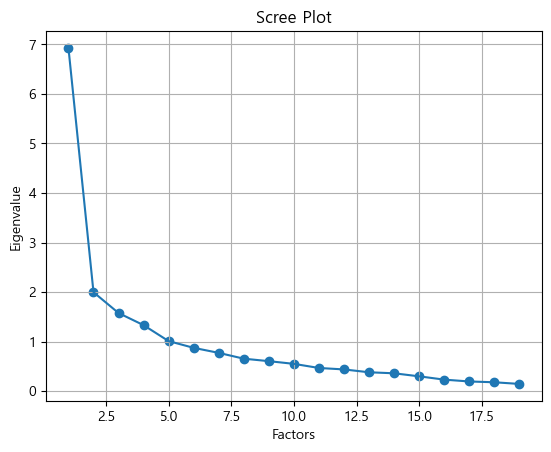

In [42]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# 요인 분석 객체 생성
fa = FactorAnalyzer(n_factors=11, rotation=None)

# 요인 분석 수행
fa.fit(df_expo_5_fa)

# 요인 구조 확인
eigenvalues, vectors = fa.get_eigenvalues()

# 스크리 도표(Scree Plot) 생성
plt.scatter(range(1,df_expo_5_fa.shape[1]+1),eigenvalues)
plt.plot(range(1,df_expo_5_fa.shape[1]+1),eigenvalues)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show() # Eigen값이 1 이상일 때까지 or 그래프 기울기가 완만해지기 전까지 나누어야 데이터결함 최소화 가능 = 2개로 나누어주는 것이 최선

In [43]:
# 탐색적 요인분석 실시
fa = FactorAnalyzer(n_factors=5, rotation="varimax") # ml: 최대우도 방법
fa.fit(df_expo_5_fa)
efa_result = pd.DataFrame(fa.loadings_, index=df_expo_5_fa.columns)
efa_result

,0,1,2,3,4
Q5_1,0.222647,-0.018452,0.540683,0.353785,-0.004199
Q5_2,0.158667,0.176654,0.703602,-0.005583,-0.063012
Q5_3,0.244986,0.444406,0.402355,0.090034,-0.077114
Q5_4,0.018044,0.196051,0.672994,0.072261,0.205216
Q5_5,-0.057969,0.200013,0.572036,0.469593,0.098527
Q5_6,0.228028,0.226924,0.163986,0.709775,0.110162
Q5_7,0.303902,0.150101,-0.047078,0.737481,0.023751
Q5_8,0.050246,0.046184,0.169152,0.538860,0.237415
Q5_9,0.529208,0.220805,-0.035858,0.148885,0.656874
Q5_10,0.217402,0.082778,0.110674,0.184202,0.653486


<AxesSubplot:>

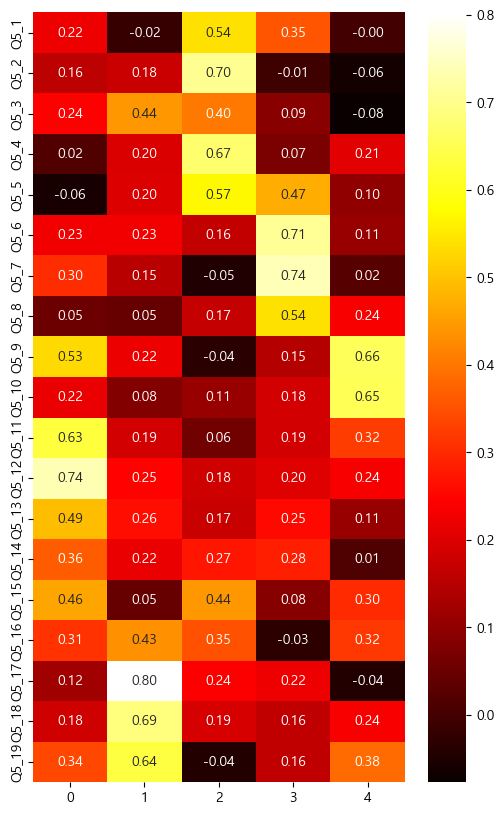

In [44]:
import seaborn as sns
plt.figure(figsize=(6,10))
sns.heatmap(efa_result, cmap='hot', annot=True, fmt='.2f')

In [33]:
# 가중평균 계산 및 리스트 형태로 저장
expo_5_dic = {'설문':[],
              '평균':[],
              '5_빈도':[],
              '4_빈도':[],
              '3_빈도':[],
              '2_빈도':[],
              '1_빈도':[],
              '5_비율':[],
              '4_비율':[],
              '3_비율':[],
              '2_비율':[],
              '1_비율':[],
            }

for question in df_expo_5.columns[7:]:
    score_counts = df_expo_5[question].value_counts()#.reset_index()
    weighted_sum = (score_counts.index * score_counts).sum()
    total_count = score_counts.sum()
    weighted_mean = round(weighted_sum / total_count, 2)
    expo_5_dic['설문'].append(question)
    expo_5_dic['평균'].append(weighted_mean)

    score_counts = score_counts.reset_index()
    score_counts.columns = ['점수', '빈도']
    score_counts['비율'] = round((score_counts['빈도'] / score_counts['빈도'].sum()) * 100, 1)
    
    # 존재하는 점수들, 1개도 안나온 값들이 있음
    existing_scores = [1, 2, 3, 4, 5]
    # 누락된 점수들 찾기
    missing_scores = [score for score in existing_scores if score not in score_counts['점수'].tolist()]
    # 누락된 점수들을 데이터프레임에 추가
    for missing_score in missing_scores:
        new_row = {'점수': missing_score, '빈도': 0, '비율': 0.0}
        score_counts = pd.concat([score_counts, pd.DataFrame([new_row])], ignore_index=True)
    for num, freq, rate in zip(range(5,0,-1),score_counts['빈도'].tolist(),score_counts['비율'].tolist()):
        expo_5_dic[str(num) + '_빈도'].append(freq)
        expo_5_dic[str(num) + '_비율'].append(rate)
expo_5_df = pd.DataFrame(expo_5_dic)
expo_5_df['설문'] = expo_5_df['설문'].replace(q5_map_dic)
expo_5_df

,설문,평균,5_빈도,4_빈도,3_빈도,2_빈도,1_빈도,5_비율,4_비율,3_비율,2_비율,1_비율
0,숲속 박물관·전시회 관람,4.07,42,37,19,5,2,40.0,35.2,18.1,4.8,1.9
1,숲속 공연·음악연주회 관람,3.70,39,29,17,17,3,37.1,27.6,16.2,16.2,2.9
2,숲속 문학행사 참여,3.53,33,27,24,17,4,31.4,25.7,22.9,16.2,3.8
3,숲속 예술·활동 참여,3.80,36,29,27,11,2,34.3,27.6,25.7,10.5,1.9
4,숲 기반 생활공예·취미활동 참여,4.10,45,32,21,7,0,42.9,30.5,20.0,6.7,0.0
5,숲가꾸기 체험,3.99,41,31,25,7,1,39.0,29.5,23.8,6.7,1.0
6,임산물 수확 체험,3.91,43,30,16,12,4,41.0,28.6,15.2,11.4,3.8
7,동식물 관찰 및 학습,3.82,33,32,30,8,2,31.4,30.5,28.6,7.6,1.9
8,산림레포츠 참여,3.62,32,28,23,17,5,30.5,26.7,21.9,16.2,4.8
9,계곡레포츠 참여,3.69,34,30,20,16,5,32.4,28.6,19.0,15.2,4.8


In [34]:
# 가중평균 계산 및 리스트 형태로 저장
common_5_dic = {'설문':[],
              '평균':[],
              '5_빈도':[],
              '4_빈도':[],
              '3_빈도':[],
              '2_빈도':[],
              '1_빈도':[],
              '5_비율':[],
              '4_비율':[],
              '3_비율':[],
              '2_비율':[],
              '1_비율':[],
            }

for question in df_common_5.columns[7:]:
    score_counts = df_common_5[question].value_counts()#.reset_index()
    weighted_sum = (score_counts.index * score_counts).sum()
    total_count = score_counts.sum()
    weighted_mean = round(weighted_sum / total_count, 2)
    common_5_dic['설문'].append(question)
    common_5_dic['평균'].append(weighted_mean)

    score_counts = score_counts.reset_index()
    score_counts.columns = ['점수', '빈도']
    score_counts['비율'] = round((score_counts['빈도'] / score_counts['빈도'].sum()) * 100, 1)
    
    # 존재하는 점수들, 1개도 안나온 값들이 있음
    existing_scores = [1, 2, 3, 4, 5]
    # 누락된 점수들 찾기
    missing_scores = [score for score in existing_scores if score not in score_counts['점수'].tolist()]
    # 누락된 점수들을 데이터프레임에 추가
    for missing_score in missing_scores:
        new_row = {'점수': missing_score, '빈도': 0, '비율': 0.0}
        score_counts = score_counts.append(new_row, ignore_index=True)
    for num, freq, rate in zip(range(5,0,-1),score_counts['빈도'].tolist(),score_counts['비율'].tolist()):
        common_5_dic[str(num) + '_빈도'].append(freq)
        common_5_dic[str(num) + '_비율'].append(rate)
common_5_df = pd.DataFrame(common_5_dic)
common_5_df['설문'] = common_5_df['설문'].replace(q5_map_dic)
common_5_df

,설문,평균,5_빈도,4_빈도,3_빈도,2_빈도,1_빈도,5_비율,4_비율,3_비율,2_비율,1_비율
0,숲속 박물관·전시회 관람,3.68,490,326,215,68,39,43.1,28.6,18.9,6.0,3.4
1,숲속 공연·음악연주회 관람,3.80,436,310,297,70,25,38.3,27.2,26.1,6.2,2.2
2,숲속 문학행사 참여,3.23,439,318,179,131,71,38.6,27.9,15.7,11.5,6.2
3,숲속 예술·활동 참여,3.49,401,366,193,129,49,35.2,32.2,17.0,11.3,4.3
4,숲 기반 생활공예·취미활동 참여,3.78,462,284,282,76,34,40.6,25.0,24.8,6.7,3.0
5,숲가꾸기 체험,3.82,477,287,279,70,25,41.9,25.2,24.5,6.2,2.2
6,임산물 수확 체험,3.88,444,337,265,66,26,39.0,29.6,23.3,5.8,2.3
7,동식물 관찰 및 학습,3.65,459,340,218,86,35,40.3,29.9,19.2,7.6,3.1
8,산림레포츠 참여,3.25,366,320,178,173,101,32.2,28.1,15.6,15.2,8.9
9,계곡레포츠 참여,3.34,352,325,201,148,112,30.9,28.6,17.7,13.0,9.8


### T - test 

In [51]:
import pandas as pd
import scipy.stats as stats

dic = {
    '가치': [],
    'T_검정통계량': [],
    'p_값': [],
    '귀무가설': [],
}
for i in range(1,20):
    dic['가치'].append(q5_map_dic['Q5_%s'%i])
    # T-검정을 수행할 그룹 선택
    group1 = df_expo_5['Q5_%s'%i]
    group2 = df_common_5['Q5_%s'%i].dropna()

    # T-검정 수행
    t_stat, p_value = stats.ttest_ind(group1, group2)

    dic['T_검정통계량'].append(round(t_stat, 4))
    dic['p_값'].append(round(p_value, 4))
    
    # 유의수준 설정
    alpha = 0.05

    # p-값과 유의수준 비교
    if p_value < alpha:
        dic['귀무가설'].append('기각') # 귀무가설 기각: 두 그룹 간에 통계적으로 유의미한 차이가 있음
    else:
        dic['귀무가설'].append('채택') # 귀무가설 채택: 두 그룹 간에 통계적으로 유의미한 차이가 없음

In [52]:
import pandas as pd
import scipy.stats as stats

dic['가치'].append('총평균')
# T-검정을 수행할 그룹 선택
group1 = expo_5_df['평균']
group2 = common_5_df['평균'].dropna()

# T-검정 수행
t_stat, p_value = stats.ttest_ind(group1, group2)

dic['T_검정통계량'].append(round(t_stat, 6))
dic['p_값'].append(round(p_value, 6))

# 유의수준 설정
alpha = 0.05

# p-값과 유의수준 비교
if p_value < alpha:
    dic['귀무가설'].append('기각') # 귀무가설 기각: 두 그룹 간에 통계적으로 유의미한 차이가 있음
else:
    dic['귀무가설'].append('채택') # 귀무가설 채택: 두 그룹 간에 통계적으로 유의미한 차이가 없음
pd.DataFrame(dic)

,가치,T_검정통계량,p_값,귀무가설
0,숲속 박물관·전시회 관람,3.943500,0.000100,기각
1,숲속 공연·음악연주회 관람,-0.946800,0.343900,채택
2,숲속 문학행사 참여,2.844600,0.004500,기각
3,숲속 예술·활동 참여,2.899600,0.003800,기각
4,숲 기반 생활공예·취미활동 참여,3.140200,0.001700,기각
5,숲가꾸기 체험,1.766200,0.077600,채택
6,임산물 수확 체험,0.350800,0.725800,채택
7,동식물 관찰 및 학습,1.701100,0.089200,채택
8,산림레포츠 참여,3.103500,0.002000,기각
9,계곡레포츠 참여,2.868500,0.004200,기각


In [53]:
pd.DataFrame(dic).to_excel('5_상품속성별t검정.xlsx')

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# 그래프 생성
fig = go.Figure()

# 엑스포 그래프 추가
fig.add_trace(go.Scatter(x=expo_5_df['설문'], y=expo_5_df['평균'], mode='lines', name='산림엑스포', line=dict(color='blue')))
# 일반국민 그래프 추가
fig.add_trace(go.Scatter(x=common_5_df['설문'], y=common_5_df['평균'], mode='lines', name='일반국민', line=dict(color='red')))

# 각 지점에 숫자 표시하기
for i, row in expo_5_df.iterrows():
    fig.add_annotation(
        text=row['평균'],
        x=row['설문'],
        y=row['평균'],
        showarrow=True,
        arrowhead=7,
        font=dict(size=14)  # annotation 폰트
    )

# 두 번째 꺾은선 그래프의 annotation 추가
for i, row in common_5_df.iterrows():
    fig.add_annotation(
        text=row['평균'],
        x=row['설문'],
        y=row['평균'],
        showarrow=True,
        arrowhead=7,
        font=dict(size=14)  # annotation 폰트
    )

# 그래프 레이아웃 설정
fig.update_layout(
    xaxis_title='문항',
    yaxis_title='평균',
    margin=dict(l=100, r=20, t=50, b=50),  # 그래프 마진 조정
    yaxis_title_font=dict(
        size=15,  # Y 레이블 폰트 크기
    ),
    xaxis_title_font=dict(
        size=15,  # X 레이블 폰트 크기
    )
)
# 평균선 추가
average_line1 = expo_5_df['평균'].mean()  # 평균값 계산
average_line2 = common_5_df['평균'].mean()  # 평균값 계산
fig.add_shape(
    go.layout.Shape(
        type='line',
        x0=expo_5_df['설문'].tolist()[0],
        x1=expo_5_df['설문'].tolist()[-1],
        y0=average_line1,
        y1=average_line1,
        line=dict(color='green', width=2, dash='dash'),
    )
)
fig.add_shape(
    go.layout.Shape(
        type='line',
        x0=common_5_df['설문'].tolist()[0],
        x1=common_5_df['설문'].tolist()[-1],
        y0=average_line2,
        y1=average_line2,
        line=dict(color='green', width=2, dash='dash'),
    )
)

# 평균선에 평균을 나타내는 annotation 추가
fig.add_annotation(
    text=f'평균: {average_line1:.2f}',
    x='산림 관련 사회봉사활동',
    y=average_line1,
    showarrow=True,
    arrowhead=7,
    font=dict(size=10)
)
# 평균선에 평균을 나타내는 annotation 추가
fig.add_annotation(
    text=f'평균: {average_line2:.2f}',
    x='산림 관련 사회봉사활동',
    y=average_line2,
    showarrow=True,
    arrowhead=7,
    font=dict(size=10)
)
# 범례 추가
fig.update_layout(legend=dict(orientation="h", x=0.02, y=0.98), showlegend=True)

# 여백 (margin) 조정
fig.update_layout(margin=dict(l=100, r=100, b=70, t=70))

fig.update_xaxes(tickangle=60)

# 그래프 그리기
fig.show()

In [ ]:
expo_5_num_df = expo_5_df[['설문','5_비율','4_비율', '3_비율', '2_비율', '1_비율']]
common_5_num_df = common_5_df[['설문','5_비율','4_비율', '3_비율', '2_비율', '1_비율']]

In [ ]:
import plotly.colors as pc

# 컬러맵을 리스트로 불러오기
blues_color_map = pc.sequential.Blues
reds_color_map = pc.sequential.Reds

# 누적 막대그래프 시각화
fig = go.Figure()

# 막대 그래프 추가 (expo_5_num_df 데이터 사용)
for i in range(1, 6):
    text_labels = [f'<span style="font-size: 15px !important;">{val:.1f}%</span>' for val in expo_5_num_df[f'{i}_비율']]
    fig.add_trace(go.Bar(x=expo_5_num_df['설문'], y=expo_5_num_df[f'{i}_비율'], text=text_labels,
                         name=f'{i}점 (산림엑스포)', textposition='auto', marker=dict(color=blues_color_map[i-1])))

# 두 번째 막대 그래프 추가 (common_5_num_df 데이터 사용) - 겹치게 표시
for i in range(1, 6):
    text_labels = [f'<span style="font-size: 15px">{val:.1f}%</span>' for val in common_5_num_df[f'{i}_비율']]
    fig.add_trace(go.Bar(x=common_5_num_df['설문'], y=common_5_num_df[f'{i}_비율'], text=text_labels,
                         name=f'{i}점 (일반국민)', textposition='auto', marker=dict(color=reds_color_map[i-1])))

# 그래프 레이아웃 설정
fig.update_layout(title="산림문화의 추구 가치 비교", xaxis_title="<span style='font-size: 15px'>설문</span>", yaxis_title="<span style='font-size: 15px'>비율(%)</span>",
                  barmode='group', showlegend=True)

# 범례 텍스트 수정
fig.update_layout(legend=dict(traceorder="reversed"))

# 그래프 높이와 너비 조정
fig.update_layout(height=700, width=1400)

# 여백 (margin) 조정
fig.update_layout(margin=dict(l=100, r=100, b=70, t=70))

fig.update_xaxes(tickangle=60)

fig.show()


In [ ]:
import plotly.colors as pc

# 컬러맵을 리스트로 불러오기
blues_color_map = pc.sequential.Blues
reds_color_map = pc.sequential.Reds

# 누적 막대그래프 시각화
fig = go.Figure()

# 막대 그래프 추가 (expo_5_num_df 데이터 사용)
for i in range(1, 6):
    text_labels = [f'<span style="font-size: 14px !important;">{val:.1f}%</span>' for val in expo_5_num_df[f'{i}_비율']]
    fig.add_trace(go.Bar(x=expo_5_num_df['설문'], y=expo_5_num_df[f'{i}_비율'], text=text_labels,
                         name=f'{i}점 (산림엑스포)', textposition='auto', marker=dict(color=blues_color_map[i-1])))

# 두 번째 막대 그래프 추가 (common_5_df 데이터 사용) - 겹치게 표시
for i in range(1, 6):
    text_labels = [f'<span style="font-size: 14px !important;">{val:.1f}%</span>' for val in common_5_df[f'{i}_비율']]
    fig.add_trace(go.Bar(x=common_5_df['설문'], y=common_5_df[f'{i}_비율'], text=text_labels,
                         name=f'{i}점 (다른 데이터)', textposition='auto', marker=dict(color=reds_color_map[i-1])))

# 그래프 레이아웃 설정
fig.update_layout(title="산림문화의 추구 가치 비교", xaxis_title="설문", yaxis_title="비율 (%)",
                  barmode='relative', showlegend=True)

# 범례 텍스트 수정
fig.update_layout(legend=dict(traceorder="reversed"))

# 그래프 높이와 너비 조정
fig.update_layout(height=700, width=1400)

# 여백 (margin) 조정
fig.update_layout(margin=dict(l=100, r=100, b=70, t=70))

fig.update_xaxes(tickangle=60)

fig.show()


### 산림엑스포만 합산한 표 생성

In [ ]:
# 응답자 특성별 표 정리
q5 = list(q5_map_dic.values())
resp_map_df = pd.DataFrame(columns = q5)
# 응답자 설문 리스트 정의
sq_lst = list(Resp_Character.keys())
# 응답자 매핑 딕셔너리 정의
sq_dic = {'성별': 'SQ1', '연령': 'SQ2_1', '학력': 'SQ3', '거주지역': 'SQ4', '직업': 'SQ5'}

# 멀티인덱스를 위한 리스트 생성
mult_idx = []

for sq in sq_lst:
    for val in list(Resp_Character[sq].values()):
        # 멀티인덱스 추가
        mult_idx.append(sq)
        # 'SQ1' 열의 값으로 필터링 및 평균계산
        filtered_rows = df_expo_5[df_expo_5[sq_dic[sq]] == val].reset_index(drop=True)
        mean_list = [round(filtered_rows[i].mean(),2) for i in filtered_rows.columns[7:]]

        resp_map = {}
        for col, mean in zip(resp_map_df.columns, mean_list + [0]):
            if col == '사례수':
                resp_map[col] = filtered_rows.shape[0]
            else:
                resp_map[col] = [mean]
        else:
            resp_map = pd.DataFrame(resp_map)
            resp_map.index = [val]
            resp_map_df = pd.concat([resp_map_df,resp_map])
            resp_map_df.fillna(0.0, inplace=True)
# 멀티인덱스 생성
resp_map_df.set_index([mult_idx, resp_map_df.index], inplace=True)
resp_map_df

C:\Users\user\AppData\Local\Temp\ipykernel_25092\465180700.py:29: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



숲속 박물관·전시회 관람  숲속 공연·음악연주회 관람  숲속 문학행사 참여  숲속 예술·활동 참여  \
성별   남성                         4.08            3.64        3.46         3.70   
     여성                         4.05            3.76        3.60         3.89   
연령   10대(15세이상)                 4.00            4.14        3.71         4.43   
     20대                        4.29            3.68        3.50         3.82   
     30대                        4.36            3.36        2.93         3.71   
     40대                        4.14            4.00        3.64         3.79   
     50대                        3.84            3.68        3.42         3.79   
     60대이상                      3.78            3.65        3.91         3.65   
학력   초등학교 졸업(무학 포함)             3.75            3.00        4.25         3.50   
     중학교 재학                     3.90            4.00        3.70         4.40   
     중학교 졸업                     4.25            3.25        3.50         3.00   
     고등학교 재학                    3.00            3.50        2.50         3.00   
     고등학교 졸업                    3.55            4.27        4.09         4.00   
     대학교 재학                     4.24            3.60        3.56         3.84   
     대학교 졸업                     4.21            3.62        3.29         3.71   
     대학원 재학(석사 또는 박사)           4.00            4.00        4.00         4.50   
     대학원 졸업(석사또는 박사)            4.00            4.00        3.60         3.60   
거주지역 서울                         4.30            4.10        3.60         4.10   
     부산                         0.00            0.00        0.00         0.00   
     대구                         0.00            0.00        0.00         0.00   
     인천                         4.50            4.00        4.00         3.50   
     광주                         5.00            5.00        3.00         5.00   
     대전                         0.00            0.00        0.00         0.00   
     울산                         0.00            0.00        0.00         0.00   
     세종                         0.00            0.00        0.00         0.00   
     경기                         4.17            3.83        3.39         3.61   
     강원                         3.99            3.55        3.57         3.84   
     충북                         0.00            0.00        0.00         0.00   
     충남                         0.00            0.00        0.00         0.00   
     전북                         0.00            0.00        0.00         0.00   
     전남                         2.00            4.00        2.00         3.00   
     경북                         5.00            5.00        5.00         3.00   
     경남                         0.00            0.00        0.00         0.00   
     제주                         0.00            0.00        0.00         0.00   
직업   산림임업종사자                    3.18            3.27        3.18         3.55   
     사무종사자                      4.50            3.75        3.50         3.50   
     서비스종사자                     3.75            3.75        3.75         3.62   
     판매종사자                      4.25            4.50        2.75         4.00   
     기술기능종사자                    4.33            3.67        4.33         4.00   
     단순노무종사자                    0.00            0.00        0.00         0.00   
     전문가(교수 포함)                 4.33            4.33        4.67         4.67   
     경영직종사자                     0.00            0.00        0.00         0.00   
     자영업자(개인사업자)                4.12            3.88        3.50         3.50   
     공무원(교사포함)                  4.00            3.60        3.45         3.80   
     학생(대학원생포함)                 4.27            3.79        3.58         4.00   
     전업주부                       4.25            3.38        3.75         3.50   
     기타                         4.33            3.67        3.00         3.67   

                       숲 기반 생활공예·취미활동 참여  숲가꾸기 체험  임산물 수확 체험  동식물 관찰 및 학습  \
성별   남성                             4.02     3.96       3

### 활동별 비율 표 (문항만 변경하면 원하는 활동 표 출력 가능)

In [ ]:
# '값' 열의 값을 딕셔너리를 사용하여 일괄적으로 변경하는 함수 정의
def map_val(series, dic):
        lst = []
        for value in series:
                lst.append(dic[str(value)])
        return lst

In [ ]:
# 응답자 특성별 표 정리
q5_map = {'1':'1.매우 참여하고 싶지않다', '2':'2.참여하고 싶지않다', '3':'3.보통이다', '4':'4.참여하고 싶다', '5':'5.매우 참여하고 싶다'}
q5 = ['1.매우 참여하고 싶지않다', '2.참여하고 싶지않다', '3.보통이다', '4.참여하고 싶다', '5.매우 참여하고 싶다', '부정(1+2)', '보통(3)', '긍정(4+5)']

# 응답자 설문 리스트 정의
sq_lst = list(Resp_Character.keys())
# 응답자 매핑 딕셔너리 정의
sq_dic = {'성별': 'SQ1', '연령': 'SQ2_1', '학력': 'SQ3', '거주지역': 'SQ4', '직업': 'SQ5'}

for qq in range(1,20):
    # 멀티인덱스를 위한 리스트 생성
    mult_idx = []
    resp_map_df = pd.DataFrame(columns = q5)
    for sq in sq_lst:
        for val in list(Resp_Character[sq].values()):
            # 멀티인덱스 추가
            mult_idx.append(sq)
            # 'SQ1' 열의 값으로 필터링 및 평균계산
            filtered_rows = df_expo_5[df_expo_5[sq_dic[sq]] == val].reset_index(drop=True)
            frequency_rate_df = filtered_rows['Q5_%s'%qq].value_counts().reset_index()
            frequency_rate_df.columns = ['값', '빈도']
            frequency_rate_df['값'] = map_val(frequency_rate_df['값'], q5_map)
            frequency_rate_df['비율'] = round((frequency_rate_df['빈도'] / frequency_rate_df['빈도'].sum())*100,1)
            frequency_rate_df = frequency_rate_df.set_index(keys='값')
            
            resp_map = {}
            for i in resp_map_df.columns:
                resp_map[i] = [0.0]
            for i in resp_map_df.columns[:5]:
                try:
                    resp_map[i][0] = frequency_rate_df.loc[i, '비율']
                except:
                    pass
            for i in resp_map_df.columns[5:]:
                try:
                    f,s = i.split('+')
                    resp_map[i][0] = resp_map[q5_map[f[-1]]][0] + resp_map[q5_map[s[0]]][0]
                except:
                    f = i.split('(')[1][0]
                    resp_map[i][0] = resp_map[q5_map[f]][0]
            else:
                resp_map = pd.DataFrame(resp_map)
                resp_map.index = [val]
                resp_map_df = pd.concat([resp_map_df,resp_map])
    else:
        # 멀티인덱스 생성
        resp_map_df.set_index([mult_idx, resp_map_df.index], inplace=True)
        resp_map_df.to_excel("ex_pic/5/산림엑스포_활동/5_expo_rate%s.xlsx"%qq)

C:\Users\user\AppData\Local\Temp\ipykernel_25092\1513323205.py:44: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\user\AppData\Local\Temp\ipykernel_25092\1513323205.py:44: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\user\AppData\Local\Temp\ipykernel_25092\1513323205.py:44: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

### 일반국민만 합산한 표 생성

In [ ]:
# 응답자 특성별 표 정리
q5 = list(q5_map_dic.values())
resp_map_df = pd.DataFrame(columns = q5)
# 응답자 설문 리스트 정의
sq_lst = list(Resp_Character.keys())
# 응답자 매핑 딕셔너리 정의
sq_dic = {'성별': 'SQ1', '연령': 'SQ2_1', '학력': 'SQ3', '거주지역': 'SQ4', '직업': 'SQ5'}

# 멀티인덱스를 위한 리스트 생성
mult_idx = []

for sq in sq_lst:
    for val in list(Resp_Character[sq].values()):
        # 멀티인덱스 추가
        mult_idx.append(sq)
        # 'SQ1' 열의 값으로 필터링 및 평균계산
        filtered_rows = df_common_5[df_common_5[sq_dic[sq]] == val].reset_index(drop=True)
        mean_list = [round(filtered_rows[i].mean(),2) for i in filtered_rows.columns[7:]]

        resp_map = {}
        for col, mean in zip(resp_map_df.columns, mean_list + [0]):
            if col == '사례수':
                resp_map[col] = filtered_rows.shape[0]
            else:
                resp_map[col] = [mean]
        else:
            resp_map = pd.DataFrame(resp_map)
            resp_map.index = [val]
            resp_map_df = pd.concat([resp_map_df,resp_map])
            resp_map_df.fillna(0.0, inplace=True)
# 멀티인덱스 생성
resp_map_df.set_index([mult_idx, resp_map_df.index], inplace=True)
resp_map_df

C:\Users\user\AppData\Local\Temp\ipykernel_25092\856978092.py:29: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



숲속 박물관·전시회 관람  숲속 공연·음악연주회 관람  숲속 문학행사 참여  숲속 예술·활동 참여  \
성별   남성                         3.58            3.73        3.18         3.40   
     여성                         3.79            3.88        3.28         3.60   
연령   10대(15세이상)                 3.87            3.95        3.61         3.76   
     20대                        3.70            3.67        3.24         3.50   
     30대                        3.65            3.77        3.27         3.43   
     40대                        3.66            3.82        3.23         3.59   
     50대                        3.66            3.78        3.14         3.40   
     60대이상                      3.71            3.92        3.22         3.50   
학력   초등학교 졸업(무학 포함)             3.50            4.00        3.00         3.17   
     중학교 재학                     4.00            3.40        3.80         3.80   
     중학교 졸업                     3.14            3.43        3.21         3.57   
     고등학교 재학                    3.84            3.89        3.58         3.95   
     고등학교 졸업                    3.63            3.74        3.13         3.43   
     대학교 재학                     3.55            3.71        3.07         3.42   
     대학교 졸업                     3.70            3.83        3.26         3.50   
     대학원 재학(석사 또는 박사)           3.00            3.54        2.69         3.31   
     대학원 졸업(석사또는 박사)            3.83            3.87        3.26         3.49   
거주지역 서울                         3.63            3.84        3.24         3.36   
     부산                         3.84            3.89        3.56         3.69   
     대구                         3.68            3.78        3.08         3.42   
     인천                         3.79            3.79        3.30         3.41   
     광주                         3.77            3.94        3.06         3.66   
     대전                         3.77            3.77        3.03         3.32   
     울산                         3.33            3.33        3.12         3.21   
     세종                         3.89            3.89        3.33         4.00   
     경기                         3.66            3.75        3.21         3.44   
     강원                         3.91            3.84        3.22         3.66   
     충북                         3.59            3.54        2.95         3.43   
     충남                         3.65            4.08        3.18         3.69   
     전북                         3.63            3.69        3.34         3.40   
     전남                         3.37            3.71        2.98         3.49   
     경북                         3.75            3.84        3.19         3.60   
     경남                         3.81            3.90        3.38         3.79   
     제주                         3.65            3.80        3.50         3.70   
직업   산림임업종사자                    3.25            3.00        3.25         3.50   
     사무종사자                      3.74            3.89        3.27         3.48   
     서비스종사자                     3.67            3.76        3.37         3.59   
     판매종사자                      3.73            3.65        3.14         3.73   
     기술기능종사자                    3.37            3.46        2.97         3.28   
     단순노무종사자                    3.48            3.72        3.20         3.28   
     전문가(교수 포함)                 4.00            3.95        3.39         3.50   
     경영직종사자                     3.62            3.69        3.03         3.38   
     자영업자(개인사업자)                3.59            3.76        3.43         3.41   
     공무원(교사포함)                  3.80            4.04        3.38         3.71   
     학생(대학원생포함)                 3.61            3.71        3.18         3.55   
     전업주부                       3.82            3.87        3.26         3.60   
     기타                         3.59            3.84        2.95         3.41   

                       숲 기반 생활공예·취미활동 참여  숲가꾸기 체험  임산물 수확 체험  동식물 관찰 및 학습  \
성별   남성                             3.64     3.80       3

In [ ]:
resp_map_df.to_excel("ex_pic/5/5_일반국민_평균.xlsx")

### 활동별 비율 표 (문항만 변경하면 원하는 활동 표출력 가능)

In [ ]:
# '값' 열의 값을 딕셔너리를 사용하여 일괄적으로 변경하는 함수 정의
def map_val(series, dic):
        lst = []
        for value in series:
                lst.append(dic[str(value)])
        return lst

In [ ]:
# 응답자 특성별 표 정리
q5_map = {'1':'1.매우 참여하고 싶지않다', '2':'2.참여하고 싶지않다', '3':'3.보통이다', '4':'4.참여하고 싶다', '5':'5.매우 참여하고 싶다'}
q5 = ['1.매우 참여하고 싶지않다', '2.참여하고 싶지않다', '3.보통이다', '4.참여하고 싶다', '5.매우 참여하고 싶다', '부정(1+2)', '보통(3)', '긍정(4+5)']

# 응답자 설문 리스트 정의
sq_lst = list(Resp_Character.keys())
# 응답자 매핑 딕셔너리 정의
sq_dic = {'성별': 'SQ1', '연령': 'SQ2_1', '학력': 'SQ3', '거주지역': 'SQ4', '직업': 'SQ5'}

for qq in range(1,20):
    # 멀티인덱스를 위한 리스트 생성
    mult_idx = []
    resp_map_df = pd.DataFrame(columns = q5)
    for sq in sq_lst:
        for val in list(Resp_Character[sq].values()):
            # 멀티인덱스 추가
            mult_idx.append(sq)
            # 'SQ1' 열의 값으로 필터링 및 평균계산
            filtered_rows = df_common_5[df_common_5[sq_dic[sq]] == val].reset_index(drop=True)
            frequency_rate_df = filtered_rows['Q5_1'].value_counts().reset_index()
            frequency_rate_df.columns = ['값', '빈도']
            frequency_rate_df['값'] = frequency_rate_df['값'].astype(int)
            frequency_rate_df['값'] = map_val(frequency_rate_df['값'], q5_map)
            frequency_rate_df['비율'] = round((frequency_rate_df['빈도'] / frequency_rate_df['빈도'].sum())*100,1)
            frequency_rate_df = frequency_rate_df.set_index(keys='값')
            
            resp_map = {}
            for i in resp_map_df.columns:
                resp_map[i] = [0.0]
            for i in resp_map_df.columns[:5]:
                try:
                    resp_map[i][0] = frequency_rate_df.loc[i, '비율']
                except:
                    pass
            for i in resp_map_df.columns[5:]:
                try:
                    f,s = i.split('+')
                    resp_map[i][0] = resp_map[q5_map[f[-1]]][0] + resp_map[q5_map[s[0]]][0]
                except:
                    f = i.split('(')[1][0]
                    resp_map[i][0] = resp_map[q5_map[f]][0]
            else:
                resp_map = pd.DataFrame(resp_map)
                resp_map.index = [val]
                resp_map_df = pd.concat([resp_map_df,resp_map])
    else:
        # 멀티인덱스 생성
        resp_map_df.set_index([mult_idx, resp_map_df.index], inplace=True)
        resp_map_df.to_excel("ex_pic/5/일반국민_활동/5_common_rate%s.xlsx"%qq)

C:\Users\user\AppData\Local\Temp\ipykernel_25092\2801597164.py:45: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\user\AppData\Local\Temp\ipykernel_25092\2801597164.py:45: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\user\AppData\Local\Temp\ipykernel_25092\2801597164.py:45: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

## Q6. 산림문화의 영향력에 대한 생각

In [39]:
# 응답자 특성과 4번 설문에 대한 항목만 필터링
df_expo_6 = df_expo[list(df_expo.columns[:7]) + list(df_expo.columns[45:49])]
df_common_6 = df_common[list(df_common.columns[:7]) + list(df_common.columns[7:11])]

q6_map_dic = {'Q6_1': '국민 삶의 질 향상에 기여',
            'Q6_2': '지역경제 활성화에 기여',
            'Q6_3': '우리 실생활에 도움',
            'Q6_4': '국민 모두가 쉽게 즐길 수 있음'}

In [40]:
# 가중평균 계산 및 리스트 형태로 저장
expo_6_dic = {'설문':[],
              '평균':[],
              '5_빈도':[],
              '4_빈도':[],
              '3_빈도':[],
              '2_빈도':[],
              '1_빈도':[],
              '5_비율':[],
              '4_비율':[],
              '3_비율':[],
              '2_비율':[],
              '1_비율':[],
            }

for question in df_expo_6.columns[7:]:
    score_counts = df_expo_6[question].value_counts()#.reset_index()
    weighted_sum = (score_counts.index * score_counts).sum()
    total_count = score_counts.sum()
    weighted_mean = round(weighted_sum / total_count, 2)
    expo_6_dic['설문'].append(question)
    expo_6_dic['평균'].append(weighted_mean)

    score_counts = score_counts.reset_index()
    score_counts.columns = ['점수', '빈도']
    score_counts['비율'] = round((score_counts['빈도'] / score_counts['빈도'].sum()) * 100, 1)
    
    # 존재하는 점수들, 1개도 안나온 값들이 있음
    existing_scores = [1, 2, 3, 4, 5]
    # 누락된 점수들 찾기
    missing_scores = [score for score in existing_scores if score not in score_counts['점수'].tolist()]
    # 누락된 점수들을 데이터프레임에 추가
    for missing_score in missing_scores:
        new_row = {'점수': missing_score, '빈도': 0, '비율': 0.0}
        score_counts = pd.concat([score_counts, pd.DataFrame([new_row])], ignore_index=True)
    for num, freq, rate in zip(range(5,0,-1),score_counts['빈도'].tolist(),score_counts['비율'].tolist()):
        expo_6_dic[str(num) + '_빈도'].append(freq)
        expo_6_dic[str(num) + '_비율'].append(rate)
expo_6_df = pd.DataFrame(expo_6_dic)
expo_6_df['설문'] = expo_6_df['설문'].replace(q6_map_dic)
expo_6_df

,설문,평균,5_빈도,4_빈도,3_빈도,2_빈도,1_빈도,5_비율,4_비율,3_비율,2_비율,1_비율
0,국민 삶의 질 향상에 기여,4.18,52,28,20,3,2,49.5,26.7,19.0,2.9,1.9
1,지역경제 활성화에 기여,4.05,42,35,21,5,2,40.0,33.3,20.0,4.8,1.9
2,우리 실생활에 도움,4.08,41,39,18,6,1,39.0,37.1,17.1,5.7,1.0
3,국민 모두가 쉽게 즐길 수 있음,4.26,55,27,19,3,1,52.4,25.7,18.1,2.9,1.0


In [41]:
# 가중평균 계산 및 리스트 형태로 저장
common_6_dic = {'설문':[],
              '평균':[],
              '5_빈도':[],
              '4_빈도':[],
              '3_빈도':[],
              '2_빈도':[],
              '1_빈도':[],
              '5_비율':[],
              '4_비율':[],
              '3_비율':[],
              '2_비율':[],
              '1_비율':[],
            }

for question in df_common_6.columns[7:]:
    score_counts = df_common_6[question].value_counts()#.reset_index()
    weighted_sum = (score_counts.index * score_counts).sum()
    total_count = score_counts.sum()
    weighted_mean = round(weighted_sum / total_count, 2)
    common_6_dic['설문'].append(question)
    common_6_dic['평균'].append(weighted_mean)

    score_counts = score_counts.reset_index()
    score_counts.columns = ['점수', '빈도']
    score_counts['비율'] = round((score_counts['빈도'] / score_counts['빈도'].sum()) * 100, 1)
    
    # 존재하는 점수들, 1개도 안나온 값들이 있음
    existing_scores = [1, 2, 3, 4, 5]
    # 누락된 점수들 찾기
    missing_scores = [score for score in existing_scores if score not in score_counts['점수'].tolist()]
    # 누락된 점수들을 데이터프레임에 추가
    for missing_score in missing_scores:
        new_row = {'점수': missing_score, '빈도': 0, '비율': 0.0}
        score_counts = score_counts.append(new_row, ignore_index=True)
    for num, freq, rate in zip(range(5,0,-1),score_counts['빈도'].tolist(),score_counts['비율'].tolist()):
        common_6_dic[str(num) + '_빈도'].append(freq)
        common_6_dic[str(num) + '_비율'].append(rate)
common_6_df = pd.DataFrame(common_6_dic)
common_6_df['설문'] = common_6_df['설문'].replace(q6_map_dic)
common_6_df

,설문,평균,5_빈도,4_빈도,3_빈도,2_빈도,1_빈도,5_비율,4_비율,3_비율,2_비율,1_비율
0,국민 삶의 질 향상에 기여,3.67,819,534,228,95,24,48.2,31.4,13.4,5.6,1.4
1,지역경제 활성화에 기여,3.59,910,576,112,81,21,53.5,33.9,6.6,4.8,1.2
2,우리 실생활에 도움,3.65,851,563,185,83,18,50.1,33.1,10.9,4.9,1.1
3,국민 모두가 쉽게 즐길 수 있음,3.45,736,678,150,111,25,43.3,39.9,8.8,6.5,1.5


In [47]:
import pandas as pd
import scipy.stats as stats

dic = {
    '가치': [],
    'T_검정통계량': [],
    'p_값': [],
    '귀무가설': [],
}
for i in range(1,5):
    dic['가치'].append(q6_map_dic['Q6_%s'%i])
    # T-검정을 수행할 그룹 선택
    group1 = df_expo_6['Q6_%s'%i]
    group2 = df_common_6['Q6_%s'%i].dropna()

    # T-검정 수행
    t_stat, p_value = stats.ttest_ind(group1, group2)

    dic['T_검정통계량'].append(round(t_stat, 6))
    dic['p_값'].append(round(p_value, 6))
    
    # 유의수준 설정
    alpha = 0.05

    # p-값과 유의수준 비교
    if p_value < alpha:
        dic['귀무가설'].append('기각') # 귀무가설 기각: 두 그룹 간에 통계적으로 유의미한 차이가 있음
    else:
        dic['귀무가설'].append('채택') # 귀무가설 채택: 두 그룹 간에 통계적으로 유의미한 차이가 없음

In [48]:
import pandas as pd
import scipy.stats as stats

dic['가치'].append('총평균')
# T-검정을 수행할 그룹 선택
group1 = expo_6_df['평균']
group2 = common_6_df['평균'].dropna()

# T-검정 수행
t_stat, p_value = stats.ttest_ind(group1, group2)

dic['T_검정통계량'].append(round(t_stat, 6))
dic['p_값'].append(round(p_value, 6))

# 유의수준 설정
alpha = 0.05

# p-값과 유의수준 비교
if p_value < alpha:
    dic['귀무가설'].append('기각') # 귀무가설 기각: 두 그룹 간에 통계적으로 유의미한 차이가 있음
else:
    dic['귀무가설'].append('채택') # 귀무가설 채택: 두 그룹 간에 통계적으로 유의미한 차이가 없음
pd.DataFrame(dic)

,가치,T_검정통계량,p_값,귀무가설
0,국민 삶의 질 향상에 기여,6.098712,0.000000,기각
1,지역경제 활성화에 기여,5.980791,0.000000,기각
2,우리 실생활에 도움,5.392374,0.000000,기각
3,국민 모두가 쉽게 즐길 수 있음,9.972023,0.000000,기각
4,총평균,7.997244,0.000204,기각


In [49]:
pd.DataFrame(dic).to_excel('6_영향력별t검정.xlsx')

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# 그래프 생성
fig = go.Figure()

# 엑스포 그래프 추가
fig.add_trace(go.Scatter(x=expo_6_df['설문'], y=expo_6_df['평균'], mode='lines', name='산림엑스포', line=dict(color='blue')))
# 일반국민 그래프 추가
fig.add_trace(go.Scatter(x=common_6_df['설문'], y=common_6_df['평균'], mode='lines', name='일반국민', line=dict(color='red')))

# 각 지점에 숫자 표시하기
for i, row in expo_6_df.iterrows():
    fig.add_annotation(
        text=row['평균'],
        x=row['설문'],
        y=row['평균'],
        showarrow=True,
        arrowhead=7,
        font=dict(size=14)  # annotation 폰트
    )

# 두 번째 꺾은선 그래프의 annotation 추가
for i, row in common_6_df.iterrows():
    fig.add_annotation(
        text=row['평균'],
        x=row['설문'],
        y=row['평균'],
        showarrow=True,
        arrowhead=7,
        font=dict(size=14)  # annotation 폰트
    )

# 그래프 레이아웃 설정
fig.update_layout(
    xaxis_title='문항',
    yaxis_title='평균',
    margin=dict(l=100, r=20, t=50, b=50),  # 그래프 마진 조정
    yaxis_title_font=dict(
        size=15,  # Y 레이블 폰트 크기
    ),
    xaxis_title_font=dict(
        size=15,  # X 레이블 폰트 크기
    )
)

# 범례 추가
fig.update_layout(legend=dict(orientation="h", x=0.02, y=0.98), showlegend=True)

# 여백 (margin) 조정
fig.update_layout(margin=dict(l=100, r=100, b=70, t=70))

# 평균선 추가
average_line1 = expo_6_df['평균'].mean()  # 평균값 계산
average_line2 = common_6_df['평균'].mean()  # 평균값 계산
fig.add_shape(
    go.layout.Shape(
        type='line',
        x0=expo_6_df['설문'].tolist()[0],
        x1=expo_6_df['설문'].tolist()[-1],
        y0=average_line1,
        y1=average_line1,
        line=dict(color='green', width=2, dash='dash'),
    )
)
fig.add_shape(
    go.layout.Shape(
        type='line',
        x0=common_6_df['설문'].tolist()[0],
        x1=common_6_df['설문'].tolist()[-1],
        y0=average_line2,
        y1=average_line2,
        line=dict(color='green', width=2, dash='dash'),
    )
)

# 평균선에 평균을 나타내는 annotation 추가
fig.add_annotation(
    text=f'평균: {average_line1:.2f}',
    x=expo_6_df['설문'].min(),
    y=average_line1,
    showarrow=True,
    arrowhead=7,
    font=dict(size=10)
)
# 평균선에 평균을 나타내는 annotation 추가
fig.add_annotation(
    text=f'평균: {average_line2:.2f}',
    x=common_6_df['설문'].min(),
    y=average_line2,
    showarrow=True,
    arrowhead=7,
    font=dict(size=10)
)

# 그래프 그리기
fig.show()

In [ ]:
expo_6_rate_df = expo_6_df[['설문','5_비율','4_비율', '3_비율', '2_비율', '1_비율']]
expo_6_rate_df_t = expo_6_rate_df.set_index(keys='설문').T.reset_index()
expo_6_rate_df_t.rename(columns = {"index": "설문"},inplace=True)
expo_6_rate_df_t["설문"] = ['매우 기여한다','기여하는 편이다','보통이다','별로 기여하지 못한다','전혀 기여하지 못한다']

common_6_rate_df = common_6_df[['설문','5_비율','4_비율', '3_비율', '2_비율', '1_비율']]
common_6_rate_df_t = common_6_rate_df.set_index(keys='설문').T.reset_index()
common_6_rate_df_t.rename(columns = {"index": "설문"},inplace=True)
common_6_rate_df_t["설문"] = ['매우 기여한다','기여하는 편이다','보통이다','별로 기여하지 못한다','전혀 기여하지 못한다']

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.colors as pc

# 두 개의 파이 차트를 나란히 그리기 위한 subplot 생성
fig = make_subplots(rows=2, cols=2, subplot_titles=["<span style='font-size: 20px; font-weight:bold;'>국민 삶의 질 향상에 기여</span>",
                                                    "<span style='font-size: 20px; font-weight:bold;'>지역경제 활성화에 기여</span>",
                                                    "<span style='font-size: 20px; font-weight:bold;'>우리 실생활에 도움</span>",
                                                    "<span style='font-size: 20px; font-weight:bold;'>국민 모두가 쉽게 즐길 수 있음</span>"],
                                                    specs=[[{'type': 'pie'}, {'type': 'pie'}], [{'type': 'pie'}, {'type': 'pie'}]])

# 각 서브플롯에 대한 데이터 설정 및 파이 차트 추가
fig.add_trace(go.Pie(labels=expo_6_rate_df_t['설문'], values=expo_6_rate_df_t['국민 삶의 질 향상에 기여'], hole=0.4, marker=dict(colors=color_scale[::2])), row=1, col=1)
fig.add_trace(go.Pie(labels=expo_6_rate_df_t['설문'], values=expo_6_rate_df_t['지역경제 활성화에 기여'], hole=0.4, marker=dict(colors=color_scale[::2])), row=1, col=2)
fig.add_trace(go.Pie(labels=expo_6_rate_df_t['설문'], values=expo_6_rate_df_t['우리 실생활에 도움'], hole=0.4, marker=dict(colors=color_scale[::2])), row=2, col=1)
fig.add_trace(go.Pie(labels=expo_6_rate_df_t['설문'], values=expo_6_rate_df_t['국민 모두가 쉽게 즐길 수 있음'], hole=0.4, marker=dict(colors=color_scale[::2])), row=2, col=2)

# 서브플롯의 레이아웃 설정
fig.update_layout(height=1000, width=1500)

# 차트 내에 비율 숫자 직접 표시
pull_lst = [0.01] * 12  # 수정 필요
fig.update_traces(textinfo='percent+label', pull=pull_lst, insidetextorientation='horizontal')

# 가운데 공백에 글자 추가
#fig.add_annotation(text="가운데", x=0.25, y=0.25, showarrow=False, font=dict(size=24))

# 차트 출력
fig.show()

In [ ]:
import plotly.colors as pc

# 컬러맵을 리스트로 불러오기
blues_color_map = pc.sequential.Blues
reds_color_map = pc.sequential.Reds

# 누적 막대그래프 시각화
fig = go.Figure()

# 막대 그래프 추가 (expo_6_rate_df 데이터 사용)
for i in range(1, 6):
    text_labels = [f'<span style="font-size: 15px !important;">{val:.1f}%</span>' for val in expo_6_rate_df[f'{i}_비율']]
    fig.add_trace(go.Bar(x=expo_6_rate_df['설문'], y=expo_6_rate_df[f'{i}_비율'], text=text_labels,
                         name=f'{i}점 (산림엑스포)', textposition='auto', marker=dict(color=blues_color_map[i-1])))

# 두 번째 막대 그래프 추가 (common_6_rate_df 데이터 사용) - 겹치게 표시
for i in range(1, 6):
    text_labels = [f'<span style="font-size: 15px">{val:.1f}%</span>' for val in common_6_rate_df[f'{i}_비율']]
    fig.add_trace(go.Bar(x=common_6_rate_df['설문'], y=common_6_rate_df[f'{i}_비율'], text=text_labels,
                         name=f'{i}점 (일반국민)', textposition='auto', marker=dict(color=reds_color_map[i-1])))

# 그래프 레이아웃 설정
fig.update_layout(title="산림문화의 영향력 비교", xaxis_title="<span style='font-size: 15px'>설문</span>", yaxis_title="<span style='font-size: 15px'>비율(%)</span>",
                  barmode='group', showlegend=True)

# 범례 텍스트 수정
fig.update_layout(legend=dict(traceorder="reversed"))

# 그래프 높이와 너비 조정
fig.update_layout(height=700, width=1400)

# 여백 (margin) 조정
fig.update_layout(margin=dict(l=100, r=100, b=70, t=70))

fig.show()

In [ ]:
import plotly.colors as pc

# 컬러맵을 리스트로 불러오기
blues_color_map = pc.sequential.Blues
reds_color_map = pc.sequential.Reds

# 누적 막대그래프 시각화
fig = go.Figure()

# 막대 그래프 추가 (expo_6_rate_df 데이터 사용)
for i in range(1, 6):
    text_labels = [f'<span style="font-size: 14px !important;">{val:.1f}%</span>' for val in expo_6_rate_df[f'{i}_비율']]
    fig.add_trace(go.Bar(x=expo_6_rate_df['설문'], y=expo_6_rate_df[f'{i}_비율'], text=text_labels,
                         name=f'{i}점 (산림엑스포)', textposition='auto', marker=dict(color=blues_color_map[i-1])))

# 두 번째 막대 그래프 추가 (common_6_rate_df 데이터 사용) - 겹치게 표시
for i in range(1, 6):
    text_labels = [f'<span style="font-size: 14px !important;">{val:.1f}%</span>' for val in common_6_rate_df[f'{i}_비율']]
    fig.add_trace(go.Bar(x=common_6_rate_df['설문'], y=common_6_rate_df[f'{i}_비율'], text=text_labels,
                         name=f'{i}점 (일반국민)', textposition='auto', marker=dict(color=reds_color_map[i-1])))

# 그래프 레이아웃 설정
fig.update_layout(title="산림문화의 영향력 비교", xaxis_title="설문", yaxis_title="비율 (%)",
                  barmode='relative', showlegend=True)

# 범례 텍스트 수정
fig.update_layout(legend=dict(traceorder="reversed"))

# 그래프 높이와 너비 조정
fig.update_layout(height=700, width=1400)

# 여백 (margin) 조정
fig.update_layout(margin=dict(l=100, r=100, b=70, t=70))

fig.show()


### 산림엑스포만 합산한 표 생성

In [ ]:
# 응답자 특성별 표 정리
q6 = list(q6_map_dic.values())
resp_map_df = pd.DataFrame(columns = q6)
# 응답자 설문 리스트 정의
sq_lst = list(Resp_Character.keys())
# 응답자 매핑 딕셔너리 정의
sq_dic = {'성별': 'SQ1', '연령': 'SQ2_1', '학력': 'SQ3', '거주지역': 'SQ4', '직업': 'SQ5'}

# 멀티인덱스를 위한 리스트 생성
mult_idx = []

for sq in sq_lst:
    for val in list(Resp_Character[sq].values()):
        # 멀티인덱스 추가
        mult_idx.append(sq)
        # 'SQ1' 열의 값으로 필터링 및 평균계산
        filtered_rows = df_expo_6[df_expo_6[sq_dic[sq]] == val].reset_index(drop=True)
        mean_list = [round(filtered_rows[i].mean(),2) for i in filtered_rows.columns[7:]]

        resp_map = {}
        for col, mean in zip(resp_map_df.columns, mean_list + [0]):
            if col == '사례수':
                resp_map[col] = filtered_rows.shape[0]
            else:
                resp_map[col] = [mean]
        else:
            resp_map = pd.DataFrame(resp_map)
            resp_map.index = [val]
            resp_map_df = pd.concat([resp_map_df,resp_map])
            resp_map_df.fillna(0.0, inplace=True)
# 멀티인덱스 생성
resp_map_df.set_index([mult_idx, resp_map_df.index], inplace=True)
resp_map_df

C:\Users\user\AppData\Local\Temp\ipykernel_25092\2997351631.py:29: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



국민 삶의 질 향상에 기여  지역경제 활성화에 기여  우리 실생활에 도움  \
성별   남성                          4.18          4.02        3.92   
     여성                          4.18          4.07        4.22   
연령   10대(15세이상)                  3.71          3.57        4.14   
     20대                         4.43          4.36        4.21   
     30대                         4.36          4.00        3.79   
     40대                         3.93          3.79        3.71   
     50대                         4.37          3.89        4.32   
     60대이상                       3.91          4.13        4.09   
학력   초등학교 졸업(무학 포함)              3.00          3.00        3.75   
     중학교 재학                      3.80          3.90        4.00   
     중학교 졸업                      3.00          4.00        4.25   
     고등학교 재학                     3.00          3.00        3.50   
     고등학교 졸업                     4.36          4.18        4.18   
     대학교 재학                      4.44          4.32        4.16   
     대학교 졸업                      4.31          4.00        4.02   
     대학원 재학(석사 또는 박사)            4.50          4.50        4.50   
     대학원 졸업(석사또는 박사)             4.40          4.20        4.20   
거주지역 서울                          4.00          3.90        3.90   
     부산                          0.00          0.00        0.00   
     대구                          0.00          0.00        0.00   
     인천                          5.00          5.00        5.00   
     광주                          3.00          3.00        3.00   
     대전                          0.00          0.00        0.00   
     울산                          0.00          0.00        0.00   
     세종                          0.00          0.00        0.00   
     경기                          4.52          4.26        4.22   
     강원                          4.09          3.99        4.06   
     충북                          0.00          0.00        0.00   
     충남                          0.00          0.00        0.00   
     전북                          0.00          0.00        0.00   
     전남                          3.00          3.00        2.00   
     경북                          5.00          5.00        5.00   
     경남                          0.00          0.00        0.00   
     제주                          0.00          0.00        0.00   
직업   산림임업종사자                     4.09          3.82        3.64   
     사무종사자                       4.50          4.25        4.25   
     서비스종사자                      4.12          4.00        4.12   
     판매종사자                       3.50          3.50        3.25   
     기술기능종사자                     4.67          4.33        4.33   
     단순노무종사자                     0.00          0.00        0.00   
     전문가(교수 포함)                  5.00          4.67        4.33   
     경영직종사자                      0.00          0.00        0.00   
     자영업자(개인사업자)                 4.25          4.00        4.12   
     공무원(교사포함)                   4.05          3.95        4.10   
     학생(대학원생포함)                  4.24          4.15        4.15   
     전업주부                        3.75          4.00        4.25   
     기타                          5.00          4.33        4.33   

                       국민 모두가 쉽게 즐길 수 있음  
성별   남성                             4.24  
     여성                             4.27  
연령   10대(15세이상)                     4.86  
     20대                            4.32  
     30대                            4.21  
     40대                            4.14  
     50대                            4.42  
     60대이상                          3.96  
학력   초등학교 졸업(무학 포함)                 3.75  
     중학교 재학                         4.60  
     중학교 졸업                         4.25  
     고등학교 재학                        3.50  
     고등학교 졸업                        4.36  
     대학교 재학                         4.24  
     대학교 졸업                         4.17  
     대학원 재학(석사 또는 박사)               5.00  
     대학원 졸업(석사또는 박사)                4.60  
거주지역 서울                         

In [ ]:
resp_map_df.to_excel("ex_pic/6/6_엑스포_평균.xlsx")

### 영향력별 비율 표 (문항만 변경하면 원하는 영향력 표 출력 가능)

In [ ]:
# '값' 열의 값을 딕셔너리를 사용하여 일괄적으로 변경하는 함수 정의
def map_val(series, dic):
        lst = []
        for value in series:
                lst.append(dic[str(value)])
        return lst

In [ ]:
# 응답자 특성별 표 정리
q6_map = {'1':'1.매우 아니다', '2':'2.아니다', '3':'3.보통이다', '4':'4.그렇다', '5':'5.매우 그렇다'}
q6 = ['1.매우 아니다', '2.아니다', '3.보통이다', '4.그렇다', '5.매우 그렇다', '부정(1+2)', '보통(3)', '긍정(4+5)']

# 응답자 설문 리스트 정의
sq_lst = list(Resp_Character.keys())
# 응답자 매핑 딕셔너리 정의
sq_dic = {'성별': 'SQ1', '연령': 'SQ2_1', '학력': 'SQ3', '거주지역': 'SQ4', '직업': 'SQ5'}

for qq in range(1,5):
    # 멀티인덱스를 위한 리스트 생성
    mult_idx = []
    resp_map_df = pd.DataFrame(columns = q6)
    for sq in sq_lst:
        for val in list(Resp_Character[sq].values()):
            # 멀티인덱스 추가
            mult_idx.append(sq)
            # 'SQ1' 열의 값으로 필터링 및 평균계산
            filtered_rows = df_expo_6[df_expo_6[sq_dic[sq]] == val].reset_index(drop=True)
            frequency_rate_df = filtered_rows['Q6_%s'%qq].value_counts().reset_index()
            frequency_rate_df.columns = ['값', '빈도']
            frequency_rate_df['값'] = map_val(frequency_rate_df['값'], q6_map)
            frequency_rate_df['비율'] = round((frequency_rate_df['빈도'] / frequency_rate_df['빈도'].sum())*100,1)
            frequency_rate_df = frequency_rate_df.set_index(keys='값')
            
            resp_map = {}
            for i in resp_map_df.columns:
                resp_map[i] = [0.0]
            for i in resp_map_df.columns[:5]:
                try:
                    resp_map[i][0] = frequency_rate_df.loc[i, '비율']
                except:
                    pass
            for i in resp_map_df.columns[5:]:
                try:
                    f,s = i.split('+')
                    resp_map[i][0] = resp_map[q6_map[f[-1]]][0] + resp_map[q6_map[s[0]]][0]
                except:
                    f = i.split('(')[1][0]
                    resp_map[i][0] = resp_map[q6_map[f]][0]
            else:
                resp_map = pd.DataFrame(resp_map)
                resp_map.index = [val]
                resp_map_df = pd.concat([resp_map_df,resp_map])
    else:
        # 멀티인덱스 생성
        resp_map_df.set_index([mult_idx, resp_map_df.index], inplace=True)
        resp_map_df.to_excel('ex_pic/6/6_expo_rate%s.xlsx'%qq)

C:\Users\user\AppData\Local\Temp\ipykernel_25092\658750902.py:44: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\user\AppData\Local\Temp\ipykernel_25092\658750902.py:44: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\user\AppData\Local\Temp\ipykernel_25092\658750902.py:44: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. T

### 일반국민만 합산한 표 생성

In [ ]:
# 응답자 특성별 표 정리
q6 = list(q6_map_dic.values())
resp_map_df = pd.DataFrame(columns = q6)
# 응답자 설문 리스트 정의
sq_lst = list(Resp_Character.keys())
# 응답자 매핑 딕셔너리 정의
sq_dic = {'성별': 'SQ1', '연령': 'SQ2_1', '학력': 'SQ3', '거주지역': 'SQ4', '직업': 'SQ5'}

# 멀티인덱스를 위한 리스트 생성
mult_idx = []

for sq in sq_lst:
    for val in list(Resp_Character[sq].values()):
        # 멀티인덱스 추가
        mult_idx.append(sq)
        # 'SQ1' 열의 값으로 필터링 및 평균계산
        filtered_rows = df_common_6[df_common_6[sq_dic[sq]] == val].reset_index(drop=True)
        mean_list = [round(filtered_rows[i].mean(),2) for i in filtered_rows.columns[7:]]

        resp_map = {}
        for col, mean in zip(resp_map_df.columns, mean_list + [0]):
            if col == '사례수':
                resp_map[col] = filtered_rows.shape[0]
            else:
                resp_map[col] = [mean]
        else:
            resp_map = pd.DataFrame(resp_map)
            resp_map.index = [val]
            resp_map_df = pd.concat([resp_map_df,resp_map])
            resp_map_df.fillna(0.0, inplace=True)
# 멀티인덱스 생성
resp_map_df.set_index([mult_idx, resp_map_df.index], inplace=True)
resp_map_df

C:\Users\user\AppData\Local\Temp\ipykernel_25092\2600680465.py:29: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



국민 삶의 질 향상에 기여  지역경제 활성화에 기여  우리 실생활에 도움  \
성별   남성                          3.66          3.58        3.62   
     여성                          3.67          3.60        3.68   
연령   10대(15세이상)                  3.61          3.61        3.79   
     20대                         3.52          3.43        3.50   
     30대                         3.53          3.49        3.50   
     40대                         3.62          3.60        3.64   
     50대                         3.77          3.70        3.77   
     60대이상                       3.87          3.72        3.77   
학력   초등학교 졸업(무학 포함)              4.17          3.50        3.83   
     중학교 재학                      3.86          4.00        4.00   
     중학교 졸업                      3.50          3.50        3.46   
     고등학교 재학                     3.59          3.62        3.79   
     고등학교 졸업                     3.58          3.52        3.54   
     대학교 재학                      3.42          3.44        3.48   
     대학교 졸업                      3.70          3.62        3.68   
     대학원 재학(석사 또는 박사)            3.81          3.38        3.52   
     대학원 졸업(석사또는 박사)             3.83          3.72        3.82   
거주지역 서울                          3.57          3.53        3.61   
     부산                          3.63          3.59        3.67   
     대구                          3.64          3.44        3.64   
     인천                          3.60          3.61        3.50   
     광주                          3.77          3.71        3.83   
     대전                          3.63          3.63        3.73   
     울산                          3.68          3.53        3.61   
     세종                          3.85          3.62        3.69   
     경기                          3.69          3.61        3.67   
     강원                          3.71          3.67        3.69   
     충북                          3.60          3.42        3.50   
     충남                          3.68          3.66        3.71   
     전북                          3.57          3.52        3.57   
     전남                          3.80          3.72        3.67   
     경북                          3.79          3.70        3.78   
     경남                          3.75          3.61        3.59   
     제주                          3.95          3.86        3.77   
직업   산림임업종사자                     4.00          3.50        3.50   
     사무종사자                       3.68          3.65        3.69   
     서비스종사자                      3.71          3.68        3.76   
     판매종사자                       3.54          3.56        3.59   
     기술기능종사자                     3.69          3.55        3.58   
     단순노무종사자                     3.58          3.54        3.51   
     전문가(교수 포함)                  3.68          3.68        3.64   
     경영직종사자                      3.76          3.57        3.73   
     자영업자(개인사업자)                 3.74          3.62        3.69   
     공무원(교사포함)                   3.62          3.46        3.58   
     학생(대학원생포함)                  3.52          3.52        3.59   
     전업주부                        3.71          3.63        3.69   
     기타                          3.61          3.44        3.53   

                       국민 모두가 쉽게 즐길 수 있음  
성별   남성                             3.40  
     여성                             3.50  
연령   10대(15세이상)                     3.70  
     20대                            3.45  
     30대                            3.38  
     40대                            3.44  
     50대                            3.43  
     60대이상                          3.48  
학력   초등학교 졸업(무학 포함)                 3.83  
     중학교 재학                         4.00  
     중학교 졸업                         3.42  
     고등학교 재학                        3.83  
     고등학교 졸업                        3.38  
     대학교 재학                         3.37  
     대학교 졸업                         3.45  
     대학원 재학(석사 또는 박사)               3.43  
     대학원 졸업(석사또는 박사)                3.55  
거주지역 서울                         

### 영향력별 비율 표 (문항만 변경하면 원하는 영향력 표출력 가능)

In [ ]:
# '값' 열의 값을 딕셔너리를 사용하여 일괄적으로 변경하는 함수 정의
def map_val(series, dic):
        lst = []
        for value in series:
                lst.append(dic[str(value)])
        return lst

In [ ]:
# 응답자 특성별 표 정리
q6_map = {'1':'1.매우 아니다', '2':'2.아니다', '3':'3.보통이다', '4':'4.그렇다', '5':'5.매우 그렇다'}
q6 = ['1.매우 아니다', '2.아니다', '3.보통이다', '4.그렇다', '5.매우 그렇다', '부정(1+2)', '보통(3)', '긍정(4+5)']
resp_map_df = pd.DataFrame(columns = q6)

# 응답자 설문 리스트 정의
sq_lst = list(Resp_Character.keys())
# 응답자 매핑 딕셔너리 정의
sq_dic = {'성별': 'SQ1', '연령': 'SQ2_1', '학력': 'SQ3', '거주지역': 'SQ4', '직업': 'SQ5'}

# 멀티인덱스를 위한 리스트 생성
mult_idx = []

for sq in sq_lst:
    for val in list(Resp_Character[sq].values()):
        # 멀티인덱스 추가
        mult_idx.append(sq)
        # 'SQ1' 열의 값으로 필터링 및 평균계산
        filtered_rows = df_common_6[df_common_6[sq_dic[sq]] == val].reset_index(drop=True)
        frequency_rate_df = filtered_rows['Q6_1'].value_counts().reset_index()
        frequency_rate_df.columns = ['값', '빈도']
        frequency_rate_df['값'] = frequency_rate_df['값'].astype(int)
        frequency_rate_df['값'] = map_val(frequency_rate_df['값'], q6_map)
        frequency_rate_df['비율'] = round((frequency_rate_df['빈도'] / frequency_rate_df['빈도'].sum())*100,1)
        frequency_rate_df = frequency_rate_df.set_index(keys='값')
        
        resp_map = {}
        for i in resp_map_df.columns:
            resp_map[i] = [0.0]
        for i in resp_map_df.columns[:5]:
            try:
                resp_map[i][0] = frequency_rate_df.loc[i, '비율']
            except:
                pass
        for i in resp_map_df.columns[5:]:
            try:
                f,s = i.split('+')
                resp_map[i][0] = resp_map[q6_map[f[-1]]][0] + resp_map[q6_map[s[0]]][0]
            except:
                f = i.split('(')[1][0]
                resp_map[i][0] = resp_map[q6_map[f]][0]
        else:
            resp_map = pd.DataFrame(resp_map)
            resp_map.index = [val]
            resp_map_df = pd.concat([resp_map_df,resp_map])
# 멀티인덱스 생성
resp_map_df.set_index([mult_idx, resp_map_df.index], inplace=True)
resp_map_df

C:\Users\user\AppData\Local\Temp\ipykernel_25092\1205311091.py:45: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



1.매우 아니다  2.아니다  3.보통이다  4.그렇다  5.매우 그렇다  부정(1+2)  \
성별   남성                     1.6    5.4    32.1   47.1      13.8      7.0   
     여성                     1.2    5.7    30.7   49.3      13.1      6.9   
연령   10대(15세이상)             1.8    5.3    35.1   45.6      12.3      7.1   
     20대                    3.8    7.5    34.0   42.8      11.9     11.3   
     30대                    1.4    7.4    39.8   39.8      11.6      8.8   
     40대                    1.4    4.9    34.1   49.0      10.6      6.3   
     50대                    0.5    4.6    27.6   51.6      15.7      5.1   
     60대이상                  0.0    4.0    22.4   56.5      17.1      4.0   
학력   초등학교 졸업(무학 포함)         0.0    0.0     0.0   83.3      16.7      0.0   
     중학교 재학                 0.0    0.0    28.6   57.1      14.3      0.0   
     중학교 졸업                 0.0    3.8    42.3   53.8       0.0      3.8   
     고등학교 재학                3.4    6.9    34.5   37.9      17.2     10.3   
     고등학교 졸업                1.6    6.7    35.7   44.0      12.0      8.3   
     대학교 재학                 4.8    8.3    35.7   42.9       8.3     13.1   
     대학교 졸업                 1.2    5.1    30.6   49.0      14.1      6.3   
     대학원 재학(석사 또는 박사)       0.0    0.0    38.1   42.9      19.0      0.0   
     대학원 졸업(석사또는 박사)        0.9    6.0    19.0   57.8      16.4      6.9   
거주지역 서울                     2.2    5.9    35.8   45.2      10.9      8.1   
     부산                     0.9    8.3    30.3   47.7      12.8      9.2   
     대구                     1.3    5.1    32.1   51.3      10.3      6.4   
     인천                     3.0    3.0    35.0   49.0      10.0      6.0   
     광주                     0.0    8.3    14.6   68.8       8.3      8.3   
     대전                     0.0    6.1    38.8   40.8      14.3      6.1   
     울산                     2.6    5.3    31.6   42.1      18.4      7.9   
     세종                     0.0    0.0    30.8   53.8      15.4      0.0   
     경기                     1.1    5.5    30.7   48.9      13.8      6.6   
     강원                     2.0    8.2    26.5   42.9      20.4     10.2   
     충북                     3.8    5.8    28.8   50.0      11.5      9.6   
     충남                     1.5    2.9    35.3   47.1      13.2      4.4   
     전북                     1.8    8.9    33.9   41.1      14.3     10.7   
     전남                     0.0    9.3    24.1   44.4      22.2      9.3   
     경북                     0.0    2.4    34.1   45.1      18.3      2.4   
     경남                     1.0    4.8    25.7   55.2      13.3      5.8   
     제주                     0.0    0.0    22.7   59.1      18.2      0.0   
직업   산림임업종사자                0.0    0.0    50.0    0.0      50.0      0.0   
     사무종사자                  1.2    5.2    31.7   48.0      13.9      6.4   
     서비스종사자                 0.0    4.8    35.7   42.9      16.7      4.8   
     판매종사자                  5.6    7.4    29.6   42.6      14.8     13.0   
     기술기능종사자                0.7    4.9    33.3   47.2      13.9      5.6   
     단순노무종사자                0.0    4.3    42.0   44.9       8.7      4.3   
     전문가(교수 포함)             0.0   13.2    22.6   47.2      17.0     13.2   
     경영직종사자                 0.0    8.1    29.7   40.5      21.6      8.1   
     자영업자(개인사업자)            0.0    3.4    30.8   54.7      11.1      3.4   
     공무원(교사포함)              5.4    1.4    31.1   50.0      12.2      6.8   
     학생(대학원생포함)             3.9    7.0    34.4   43.0      11.7     10.9   
     전업주부                   0.4    5.0    29.7   52.9      12.0      5.4   
     기타                     3.0    9.0    24.1   51.9      12.0     12.0   

                       보통(3)  긍정(4+5)  
성별   남성                 32.1     60.9  
     여성                 30.7     62.4  
연령   10대(15세이상)         35.1     57.9  
     20대                34.0     54.7  
     30대                39.8     51.4  
     40대                34.1     59.6  
     50대                27.6     67.3  
     60대이상              22.4     73.6  
학력   초등학교 졸업(무

## 회귀분석

In [ ]:
df_common

,SQ1,SQ2_1,SQ2_2,SQ3,SQ4,SQ5,SQ5_13_ETC,Q6_1,Q6_2,Q6_3,Q6_4,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q4_6,Q4_7,Q4_8,Q4_9,Q4_10,Q4_11,Q4_12,Q4_12_ETC,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q5_6,Q5_7,Q5_8,Q5_9,Q5_10,Q5_11,Q5_12,Q5_13,Q5_14,Q5_15,Q5_16,Q5_17,Q5_18,Q5_19,Q5_20,Q5_20_ETC,Q7_1,Q7_2,Q7_10_ETC,Q8,Q8_7_ETC
0,여성,20대,1997,대학교 재학,부산,학생(대학원생포함),,4,3,4,3,3,4,3,4,3,4,3,4,3,4,3,NaN,NaN,3.0,4.0,3.0,4.0,3.0,4.0,3.0,4.0,3.0,4.0,3.0,4.0,3.0,4.0,3.0,4.0,3.0,4.0,3.0,NaN,NaN,3.0,6.0,NaN,3.0,NaN
1,여성,50대,1972,대학교 졸업,강원,서비스종사자,,4,4,5,2,4,4,5,4,4,5,4,5,5,4,5,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,3.0,4.0,NaN,NaN,5.0,1.0,NaN,2.0,NaN
2,여성,50대,1970,대학교 졸업,부산,사무종사자,,4,4,4,4,4,3,4,3,4,3,4,4,4,4,4,NaN,NaN,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,1.0,4.0,NaN,2.0,NaN
3,여성,50대,1972,대학교 졸업,경남,사무종사자,,4,4,4,4,4,4,4,4,4,3,3,4,4,4,4,NaN,NaN,1.0,1.0,1.0,1.0,5.0,5.0,5.0,5.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,5.0,NaN,NaN,1.0,9.0,NaN,2.0,NaN
4,여성,50대,1973,대학교 졸업,경북,기타,기타(무직),3,3,3,3,3,3,4,4,4,4,3,4,4,3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,여성,30대,1993,대학교 졸업,울산,전업주부,,4,3,2,2,4,2,4,2,4,4,2,5,3,5,3,NaN,NaN,4.0,2.0,4.0,3.0,5.0,3.0,5.0,4.0,2.0,4.0,2.0,5.0,2.0,4.0,2.0,5.0,2.0,5.0,3.0,NaN,NaN,4.0,9.0,NaN,3.0,NaN
1696,남성,30대,1987,대학교 졸업,부산,판매종사자,,5,5,5,3,5,5,5,5,5,5,5,5,5,4,5,NaN,NaN,3.0,3.0,3.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,NaN,NaN,1.0,2.0,NaN,2.0,NaN
1697,남성,60대이상,1959,대학교 졸업,서울,자영업자(개인사업자),,3,3,4,2,3,4,4,2,3,2,2,3,3,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1698,여성,50대,1972,대학교 졸업,서울,전업주부,,4,4,4,4,4,3,4,4,4,3,4,5,4,3,4,NaN,NaN,4.0,4.0,3.0,5.0,4.0,3.0,3.0,4.0,5.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0,4.0,2.0,NaN,NaN,6.0,7.0,NaN,2.0,NaN


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# X = df_expo[df_expo.columns[12:23]]
# Y = df_expo[['Q6_1']]
X = df_common[df_common.columns[11:22]]
Y = df_common[['Q6_1']]

# 선택적으로 데이터를 학습 세트와 테스트 세트로 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# 선형 회귀 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(X_train, Y_train)

# 예측
Y_pred = model.predict(X_test)

In [ ]:
# 모델 정확도 평가 (선형 회귀에서 정확도 대신 평균 제곱 오차 등을 사용)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, Y_pred)
print(f'평균 제곱 오차: {mse}')

# 모델의 계수 (회귀 계수) 출력
coefficients = model.coef_
print('회귀 계수 (모델의 가중치):')
for i, coef in enumerate(coefficients):
    print(f'X{i + 1}: {coef}')

# 모델의 절편 출력
intercept = model.intercept_
print(f'절편 (상수항): {intercept}')

평균 제곱 오차: 0.49233798588221733
회귀 계수 (모델의 가중치):
X1: [0.18074759 0.08217833 0.06232659 0.04241701 0.01056031 0.03818735
 0.04115953 0.07628342 0.11338078 0.04160003 0.0605226 ]
절편 (상수항): [0.91170175]


In [ ]:
X.to_numpy().shape

(1700, 11)

In [ ]:
Y.to_numpy().shape

(1700, 1)

In [ ]:
X_test

,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q4_6,Q4_7,Q4_8,Q4_9,Q4_10,Q4_11
1492,4,4,5,4,4,3,4,4,4,4,5
115,3,4,4,3,3,4,3,3,3,3,3
135,3,4,2,4,3,4,3,4,2,4,3
352,4,4,5,4,4,4,4,5,5,5,5
1302,2,4,3,2,4,3,2,3,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...
1231,4,3,4,5,4,3,4,3,4,4,5
864,4,4,5,4,3,3,3,4,4,3,4
1173,3,3,3,3,3,3,3,3,3,3,3
1589,3,4,3,4,3,4,4,4,4,5,4


In [ ]:
# scatter plot 그리기
plt.scatter(X, Y, color='blue', label='실제 데이터')
plt.plot(X_test, Y_prob, color='red', label='로지스틱 회귀 모델')
plt.xlabel('독립 변수')
plt.ylabel('클래스 확률')
plt.legend()
plt.show()